<div style=" background-color: RGB(123, 115, 235);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 - Détectez des faux billets avec R ou Python</h1>
</div>

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Importation des librairies</h3>
</div>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy.stats as stats
import statsmodels.api as sm

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Chargement des fichiers CSV</h3>
</div>

In [2]:
# Importation du fichier billets
billets = pd.read_csv('billets.csv', sep=";")

In [3]:
billets = pd.DataFrame(billets)

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">I - Exploration des fichiers </h2>
</div>

In [4]:
# Définir des fonctions utiles au traitement des données
def description_table(data) :
    print('Le fichier comporte {} observation(s) ou article(s).'
      .format(data.shape[0]))
    print('Le fichier comporte {} colonne(s).'
          .format(data.shape[1]), '\n')
    print('\nTypes de données : \n',data.dtypes, '\n')
    print('\nNombre de valeurs uniques : \n',data.nunique(),'\n')
    print(f"\nY a-t-il des doublons : \n {data.duplicated().any()}")
    print(f"\nY a-t-il des valeurs manquantes : \n {data.isna().any()}")
    print(f"\nY a-t-il des valeurs nulles : \n {data.isnull().any()}")
    
# Fonction pour contrôler les manquants du df entier
def manquants(df) :
    return(df.isna().sum())

# Fonction pour contrôler les données nulles du df entier
def nulles(df) :
    return(df.isnull().sum())
    
# Fonction pour calculer la proportion de données manquantes
def missing_data(liste_var,df) :
    for var in liste_var :
        print(var,' --- Proportion :',round(((df[var].isna().sum()) / len(df[var]) * 100), 2),'%')

In [5]:
description_table(billets)

Le fichier comporte 1500 observation(s) ou article(s).
Le fichier comporte 7 colonne(s). 


Types de données : 
 is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object 


Nombre de valeurs uniques : 
 is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64 


Y a-t-il des doublons : 
 False

Y a-t-il des valeurs manquantes : 
 is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low       True
margin_up       False
length          False
dtype: bool

Y a-t-il des valeurs nulles : 
 is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low       True
margin_up       False
length          False
dtype: bool


In [6]:
manquants(billets)

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
nulles(billets)

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
# Tableau du nombre de valeurs manquantes et de sa proportion par colonne
missing_values = billets.isnull().sum()
missing_percent = (missing_values / len(billets)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

              Missing Values  Percentage
is_genuine                 0    0.000000
diagonal                   0    0.000000
height_left                0    0.000000
height_right               0    0.000000
margin_low                37    2.466667
margin_up                  0    0.000000
length                     0    0.000000


Il manque 2.5% du dataset de la variable 'margin low'. 
Nous procèderons à une imputation des données manquantes ultérieurement.

In [9]:
# Visualiser les données manquantes de la variable margin low
billets[billets['margin_low'].isna()]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

Les données de marge basse sont manquantes sur les vrais billets et faux billets.

In [10]:
billets.is_genuine.value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Le jeu de données présente 2/3 de billets vrais et 1/3 de billets faux.

In [11]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

D'une manière générale, il n'y a pas d'outliers. 
On pourrait considérer que des outliers sont présents au sein de la variable
margin low au vu de la valeur max mais des données sont manquantes.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Distribution des données </h3>
</div>

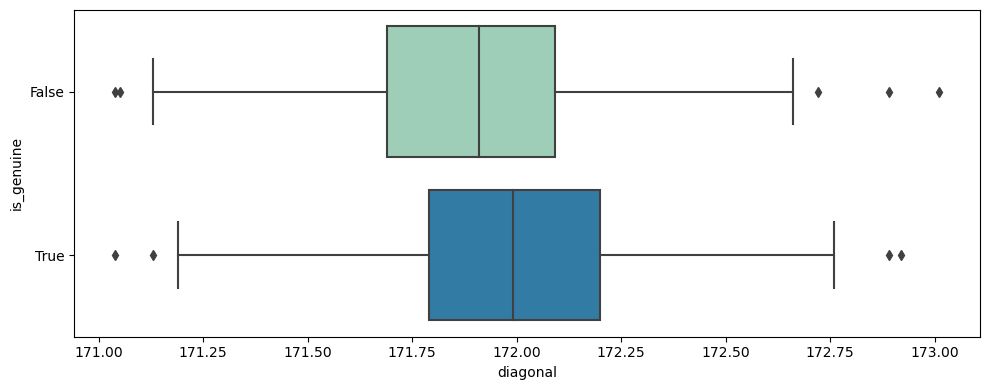

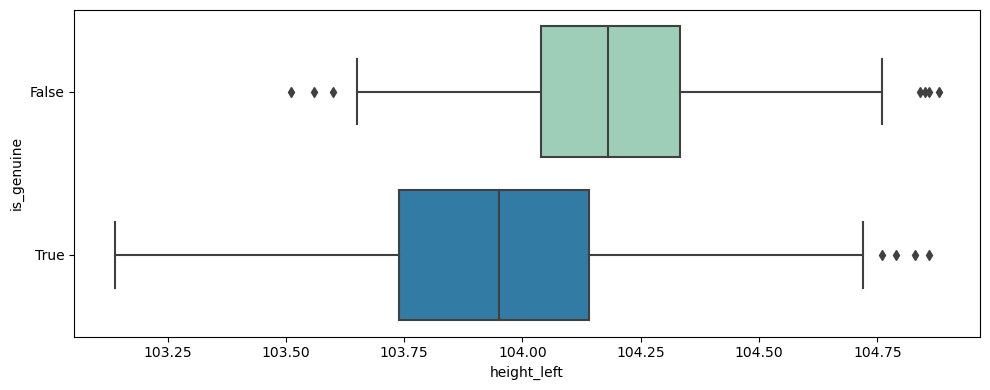

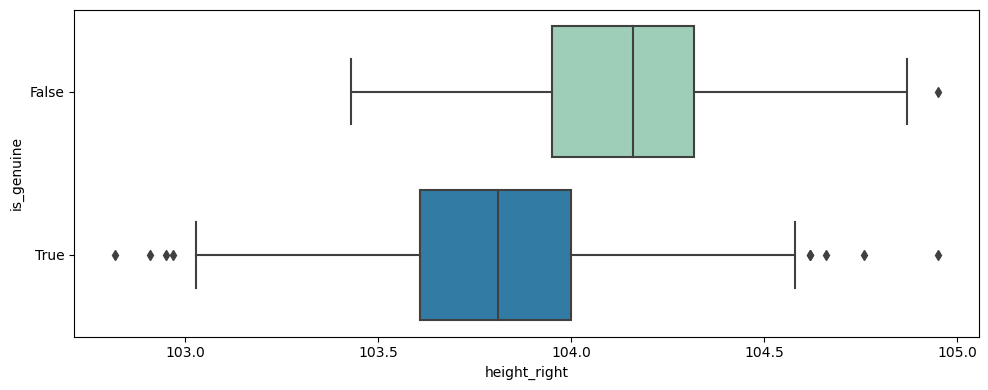

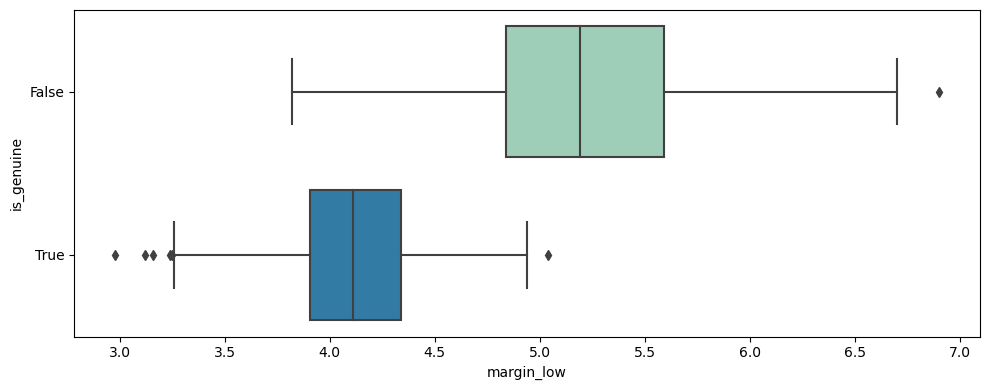

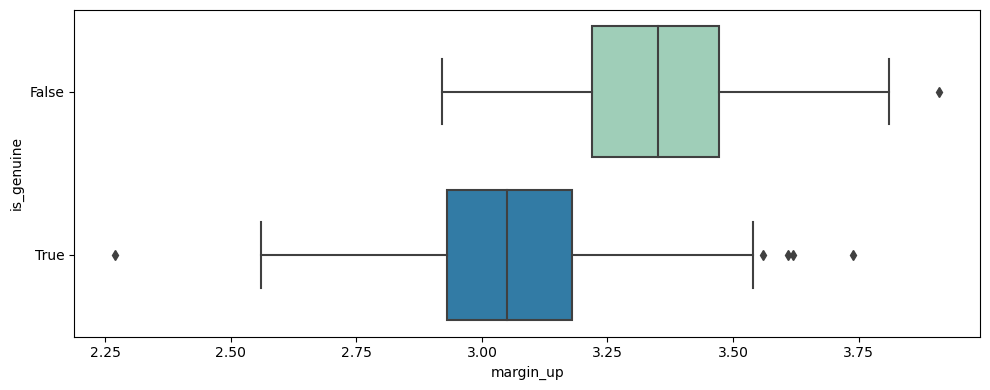

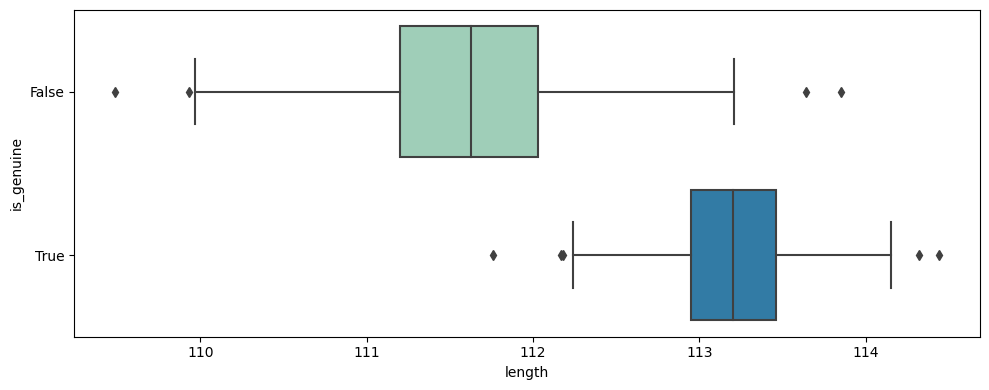

In [12]:
# Boxplot
variables = billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]

for var in variables:
    fig = plt.figure(figsize=(10, 4))
    sns.boxplot(data=billets, x=var, y='is_genuine', orient='h', palette='YlGnBu')
    plt.tight_layout()
    plt.show()
fig.savefig("boxplot.png")

Les faux billets semblent être généralement moins longs que les vrais.
En revanche ils sont plus larges et les marges hautes et basses sont plus élevées.

<Figure size 1000x1000 with 0 Axes>

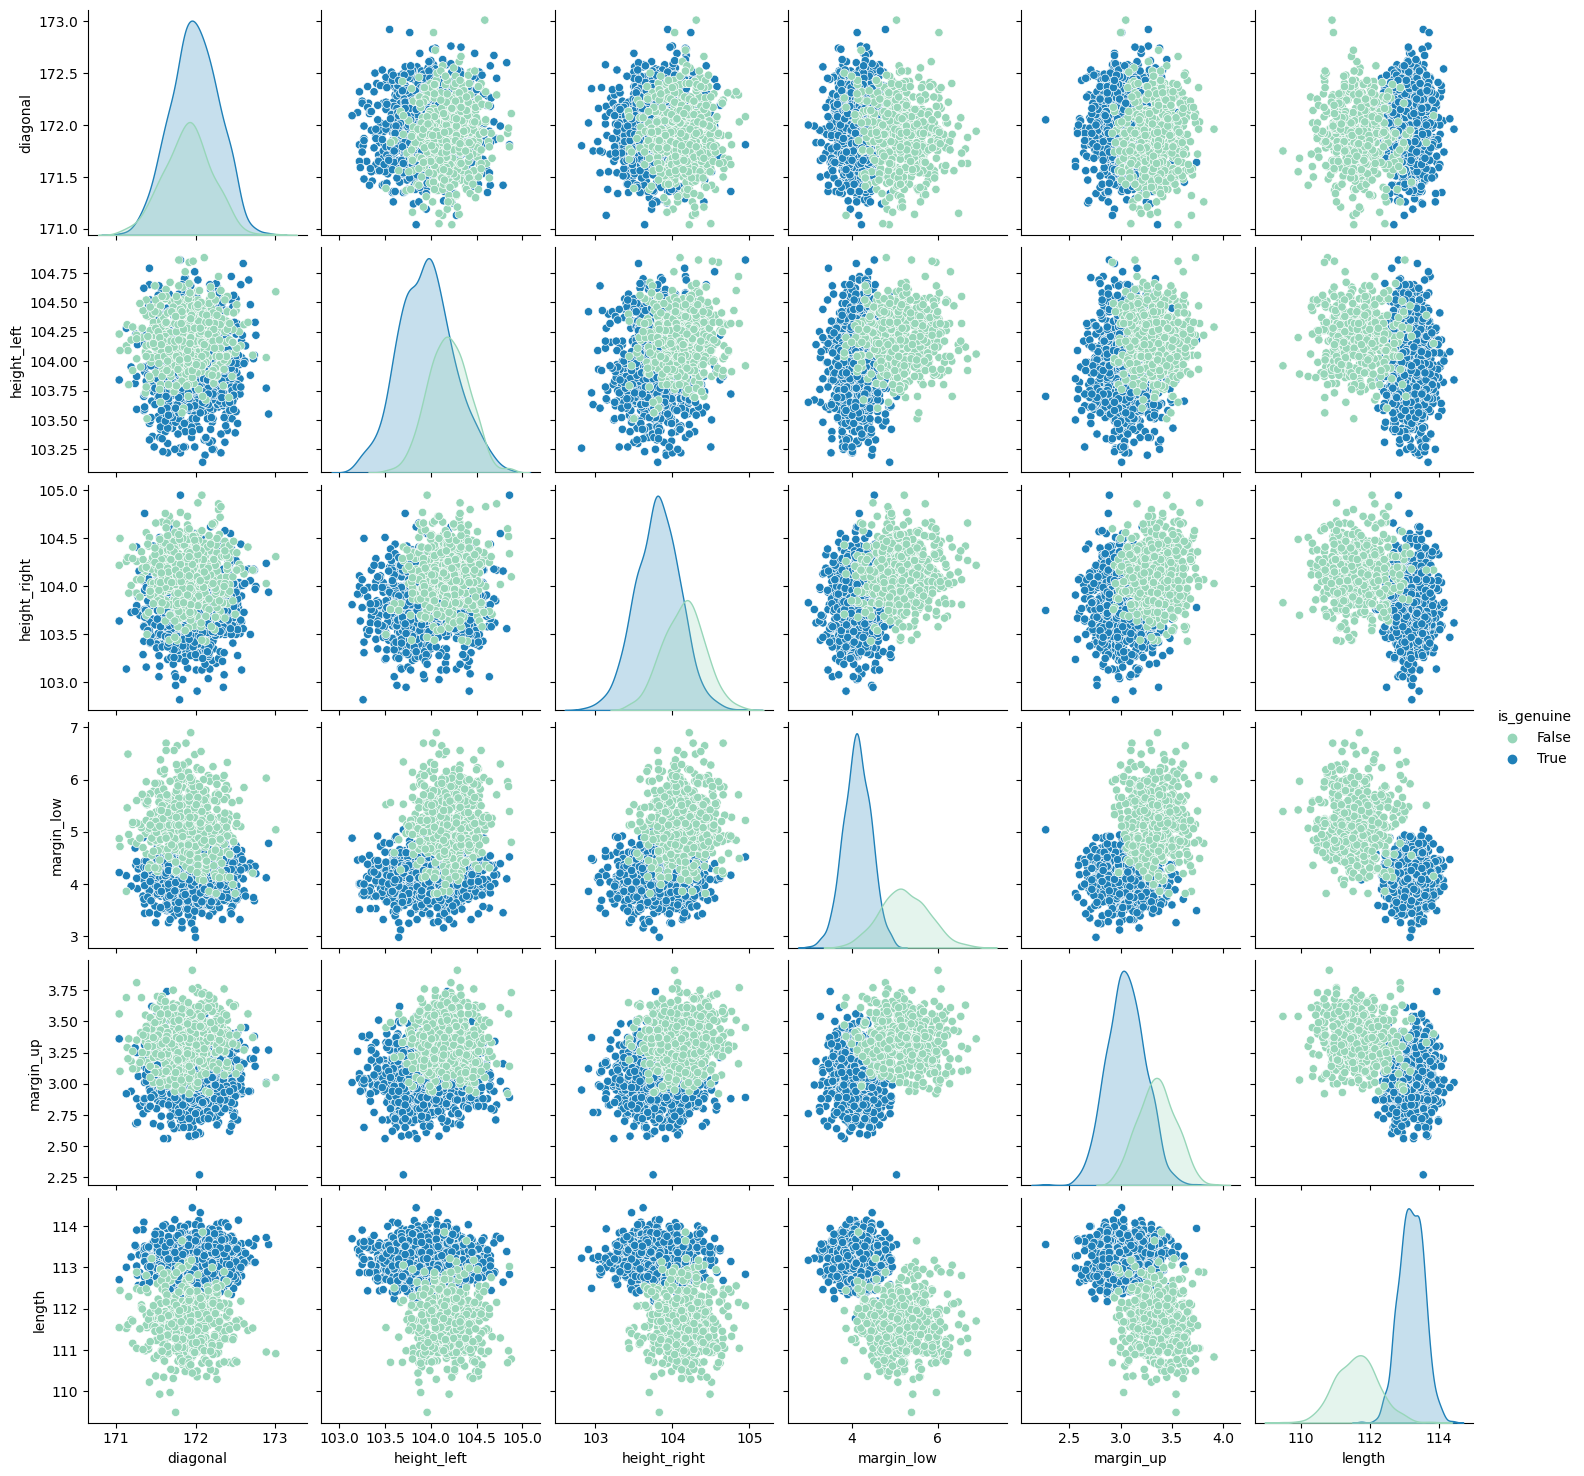

In [13]:
# Représenter les données sur un pairplot
fig = plt.figure(figsize=(10, 10))
fig = sns.pairplot(billets, hue="is_genuine", palette='YlGnBu')
plt.show()
fig.savefig('pairplot.png')

Le pairplot nous permets d'apprecier la corrélation entre les variables ainsi que la distribution des données par is_genuine.
On voit que la variable cible est fortement corrélée aux variables length et margin low.

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">II - Régression pour imputation des données manquantes </h2>
</div>

Pour imputer nos données manquantes nous réaliserons une regréssion.
Dans un premier temps, l'étude des corrélations nous permettra de mettre en lumière les variables les plus correlées
avec notre variable qui contient des données manquantes.
En outre pour éviter la multicollinéarité, la variable 'is-genuine' ne sera pas utilisée puisqu'elle est fortement corrélée à 'length'

Ainsi, on pourra compléter les valeurs manquantes de l’une en utilisant les valeurs disponibles
de l’autre.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Matrice des corrélations</h3>
</div>

In [14]:
# Tableau de contigence
billets_v2 = billets[['diagonal','height_left','height_right','margin_low','margin_up','length', 'is_genuine']]
corr_join = billets_v2.corr()
corr_join

diagonal  height_left  height_right  margin_low  margin_up  \
diagonal      1.000000     0.019472     -0.024492   -0.111534  -0.055649   
height_left   0.019472     1.000000      0.242279    0.302643   0.246522   
height_right -0.024492     0.242279      1.000000    0.391085   0.307005   
margin_low   -0.111534     0.302643      0.391085    1.000000   0.431606   
margin_up    -0.055649     0.246522      0.307005    0.431606   1.000000   
length        0.097587    -0.320863     -0.401751   -0.666753  -0.520575   
is_genuine    0.132756    -0.379833     -0.485092   -0.783032  -0.606262   

                length  is_genuine  
diagonal      0.097587    0.132756  
height_left  -0.320863   -0.379833  
height_right -0.401751   -0.485092  
margin_low   -0.666753   -0.783032  
margin_up    -0.520575   -0.606262  
length        1.000000    0.849285  
is_genuine    0.849285    1.000000

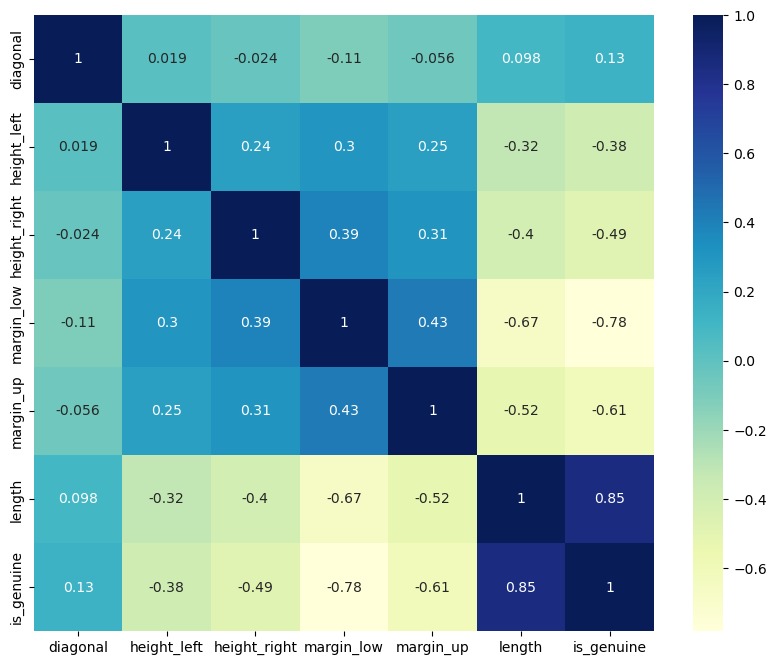

In [15]:
# Matrice des corrélations
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_join, annot=True, cmap='YlGnBu')
plt.show()
fig.savefig('matrice_corr_1.png', dpi=300)

Nous utiliserons la variable length comme variable explicative de la variable margin low (target) puisqu'elles sont fortement correlées (négativement).

<Figure size 1000x800 with 0 Axes>

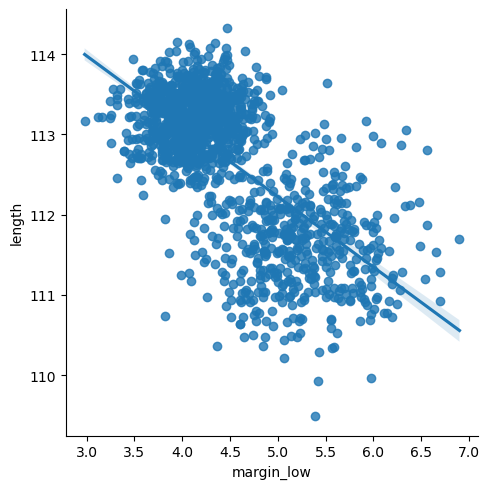

In [16]:
# Représenter les données margin low et length
fig = plt.figure(figsize=(10, 8))
sns.lmplot(x="margin_low", y="length", data=billets_v2)
fig.savefig('reg_simple.png', dpi=300)

La représentation visuelle montre bien qu'il existe une corrélation plutot linéaire 
(négative) entre les deux variables. 

Comme demandé, nous réaliserons donc une régression linéaire pour l'imputation des données manquantes.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Régression linéaire simple</h3>
</div>

Dans un premier temps, on effectue une régression linéaire simple pour prédire la valeur d'une variable dépendante en fonction d'une variable indépendante. Plus la relation linéaire entre la variable indépendante et la variable dépendante est grande, plus la prédiction est précise. On voit que length est corrélée négativement à la variable margin_low (-0.67).

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cond = ~billets.margin_low.isna()

### mettre une fontionction pour la regression lineaire
def reg_lineaire(data, variables_explicatives, variable_cible, cond = cond) : 
    X = data[variables_explicatives][cond]
    y = data[variable_cible][cond]

    scaler = MinMaxScaler()
    X[variables_explicatives] = scaler.fit_transform(X)
    X = sm.add_constant(X)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.20)
    
    # Créer le modèle de régression linéaire
    regression_model = sm.OLS(y_train, X_train)
    modele_reg = regression_model.fit()
    
    y_pred_train = modele_reg.predict(X_train) # prediction en train
    y_pred_test  = modele_reg.predict(X_valid) # prediction en test
    
    
    return modele_reg, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid

In [18]:
# Le modèle de regression simple sur length
modele_reg_simple, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
    reg_lineaire(billets, ['length'], ['margin_low'])

In [19]:
# les scores 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcul (data_test, cible_pred, cible_test) :
    # Calculer l'erreur quadratique moyenne (MSE) 
    mse = mean_squared_error(cible_test, cible_pred)
    print("Mean Squared Error (MSE) sur l'ensemble de test:", mse)

    # Calculer l'erreur absolue moyenne (MAE)
    mae = mean_absolute_error(cible_test, cible_pred)
    print("Mean Absolute Error (MAE) sur l'ensemble de test:", mae)
    
    # Calculer Racine Carrée de l'erreur quadratique (RMSE)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE) sur l'ensemble de test:", rmse)
    
    # Calculer Coeff de détermination
    r2 = r2_score(cible_test, cible_pred)
    print("Coefficient de détermination R2: ",r2)

In [20]:
calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.20501721543154086
Mean Absolute Error (MAE) sur l'ensemble de test: 0.34433118895311765
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.4527882677715279
Coefficient de détermination R2:  0.5136070700267961


**Le coefficient de détermination (R2)** est un indice de la qualité de la prédiction de la régression linéaire.
Il se situe entre 0 et 1. Plus il est proche de 1, plus la qualité du modèle est parfaite. 

Dans notre cas, **le R2 n'est pas suffisant (environ 50%)** mais il est difficilement interpretable seul. Il faut souvent le combiner avec d’autres métriques comme la MSE, RMSE ou MAE pour mieux evaluer le modèle.  
Ces métriques quantifient les erreurs réalisées par le modèle.   
Contrairement au R2, plus le score est élevé, moins le modèle est performant.

La **RMSE** mesure l'écart moyen entre les valeurs prédites par votre modèle prédictif et les valeurs réelles. Elle estime dans quelle mesure le modèle prédictif est capable de prévoir la valeur cible (précision).
Plus la valeur est faible, plus le modèle prédictif est bon.

La **MAE** quantifie l’erreur réalisée par le modèle. Plus elle est élevée, moins le modèle est performant.

**Dans notre cas, la MAE et la RMSE est plutot élevée, le modèle n'est donc pas très performant. Il faut chercher à l'améliorer.**

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Validation du modèle de régression linéaire simple</h3>
</div>

Dans une régression linéaire, les hypothèses fondamentales sont généralement les suivantes :

1. **Linéarité :** La relation entre les variables indépendantes (prédicteurs) et la variable dépendante (la cible) est linéaire. Cela signifie que les effets des prédicteurs sur la cible sont additifs et constants.

2. **Homoscédasticité :** La variance des résidus (erreurs) est constante pour toutes les valeurs des variables indépendantes. En d'autres termes, la dispersion des résidus reste uniforme le long de la plage des valeurs prédites.

3. **Indépendance des résidus :** Les résidus ne sont pas corrélés les uns avec les autres. Cela signifie qu'il ne devrait pas y avoir de structure dans les résidus lorsqu'ils sont tracés dans le temps ou dans l'ordre des observations.

4. **Normalité des résidus :** Les résidus suivent une distribution normale. Cela signifie que les erreurs de prédiction sont distribuées de manière symétrique autour de zéro.

5. **Absence de multicolinéarité :** Les variables indépendantes ne sont pas fortement corrélées les unes avec les autres. Une multicolinéarité excessive peut rendre les estimations des coefficients de régression instables et difficiles à interpréter.

Ces hypothèses sont importantes à vérifier avant de tirer des conclusions à partir d'un modèle de régression linéaire. Si l'une ou plusieurs de ces hypothèses ne sont pas respectées, cela peut compromettre la validité des résultats du modèle et nécessiter des ajustements ou des méthodes alternatives d'analyse des données.

In [21]:
# Contrôler les hypothèses de la regression linéaire
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

def residus_mod(modele):
    
    residus = modele.resid
    
    # Densité
    sns.displot(residus,kind='hist',kde=True)
    plt.xlabel("résidus")
    plt.show()
    
    ## Test de normalité de Kolmogorov
    ks_test = stats.kstest(residus, 'norm')
    print('Kolmogorov p-value :', ks_test.pvalue)
    if ks_test.pvalue > 0.05 : 
        print('H0 : Les résidus suivent une distribution normale.''\n')
    else : 
        print('H1 : Les résidus ne suivent pas une distribution normale.')
    
    print('\n')

    # Test de normalité des résidus
    stat, p_value = stats.shapiro(residus)
    print("Shapiro :", stat)
    print("p-valeur :", p_value)
    if p_value > 0.05:
        print("Les résidus suivent une distribution normale.")
    else:
        print("Les résidus ne suivent pas une distribution normale.")
    
    print('\n')
    
    # Test de Breusch-Pagan
    alpha = 0.05
    bp_test_stat, p_value, _, _ = het_breuschpagan(residus, modele.model.exog)
    print(f'Test de Breusch-Pagan : Statistique du test : {bp_test_stat}, P-value : {p_value}')
    if p_value < alpha:
        print('H1 : On constate une hétéroscédasticité.')
    else:
        print('H0 : homoscédasticité, c’est-à-dire que les termes d’erreur ont une '
              'variance constante à travers les valeurs prédites.')
    print('\n')
    
    # Indépendance des résidus
    print('Test de Durbin Watson:', durbin_watson(residus))
    print("L'hypothèse nulle est retenue si la statistique a une valeur proche de 2"
          "(pas d'auto-corrélation linéaire).")
    
    # Test de multicolinéarité
    data = modele.model.exog
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(data, i) for i in np.arange(1, data.shape[1])]

    print("\n")
    print("Facteurs d'inflation de la variance (VIF) :", vif)
    print("On constate une multicollinéarité si le score est supérieur à 10.")
    print('\n')
    
    return residus

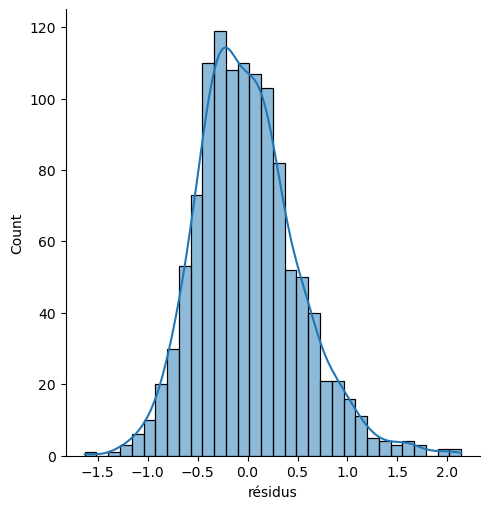

Kolmogorov p-value : 5.0810669327484233e-36
H1 : Les résidus ne suivent pas une distribution normale.


Shapiro : 0.9792358875274658
p-valeur : 6.571547993272642e-12
Les résidus ne suivent pas une distribution normale.


Test de Breusch-Pagan : Statistique du test : 49.95204206121603, P-value : 1.5755002307892408e-12
H1 : On constate une hétéroscédasticité.


Test de Durbin Watson: 1.9695122401816225
L'hypothèse nulle est retenue si la statistique a une valeur proche de 2(pas d'auto-corrélation linéaire).


Facteurs d'inflation de la variance (VIF) :    VIF
0  1.0
On constate une multicollinéarité si le score est supérieur à 10.




In [22]:
residus_modele = residus_mod(modele_reg_simple)

### Représentation des résidus via un QQplot

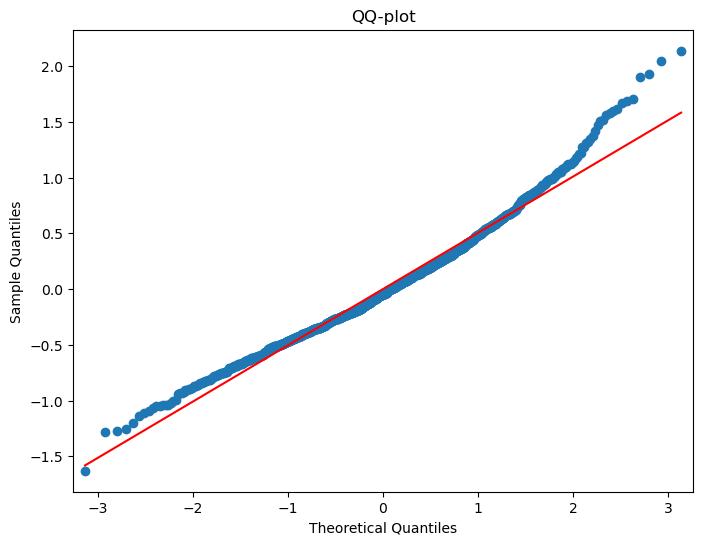

In [23]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residus_modele, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()
fig.savefig('qqplot.png')

Les points semblent majoritairement s’aligner le long de la droite. Il confirme la distribution plus haut qui semble être normal, contrairement aux résultats des tests de Shapiro et Kolmogorov.

### Linéarité

<Figure size 1000x800 with 0 Axes>

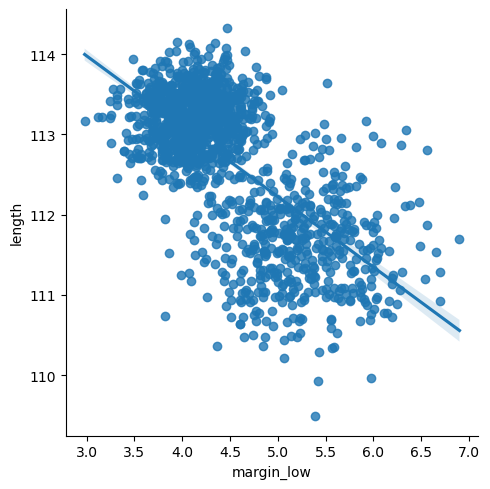

In [24]:
# Représenter les données du modèle de regression linéaire
fig = plt.figure(figsize=(10, 8))
sns.lmplot(x="margin_low", y="length", data=billets_v2)
fig.savefig('reg_simple.png')

On constate une relation linéaire entre les deux variables.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Régression linéaire multiple</h3>
</div>

Pour améliorer nos précedentes métriques et d'une manière générale notre modèle,
nous réalisons plusieurs régressions linéaire multiple pour prédire la valeur 
d'une variable dépendante en fonction de plusieurs variables indépendantes.

In [25]:
# Essai 1
modele_reg_multiple,  y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
reg_lineaire(billets, ['margin_up', 'length'], ['margin_low'])

calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.2048839702714914
Mean Absolute Error (MAE) sur l'ensemble de test: 0.3439609962461445
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.4526411053710118
Coefficient de détermination R2:  0.5139231874009629


In [26]:
# Essai 2
modele_reg_multiple, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
reg_lineaire(billets, ['height_right', 'margin_up', 'length'], ['margin_low'])

calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.19930158450386526
Mean Absolute Error (MAE) sur l'ensemble de test: 0.33856406011635465
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.44643206034498156
Coefficient de détermination R2:  0.5271671140831251


In [27]:
# Essai 3
modele_reg_multiple, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
reg_lineaire(billets, ['height_left', 'height_right', 'margin_up', 'length'], ['margin_low'])

calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.19420449953923968
Mean Absolute Error (MAE) sur l'ensemble de test: 0.3366926652564162
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.4406863959089725
Coefficient de détermination R2:  0.5392596892605226


In [28]:
# Essai 4 
modele_reg_multiple, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
reg_lineaire(billets, ['length', 'is_genuine'], ['margin_low'])

calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.1396662055354939
Mean Absolute Error (MAE) sur l'ensemble de test: 0.2887114919343477
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.37371942087011467
Coefficient de détermination R2:  0.6686490215679834


En ajoutant la variable **is_genuine**, la précision du modèle est améliorée significativement par rapport
aux essais précédents, continuons d'essayer d'améliorer les résultats.

In [29]:
# Essai 5 
modele_reg_multiple, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
reg_lineaire(billets, ['diagonal', 'height_left', 'height_right', 'margin_up', 'length', 'is_genuine'], ['margin_low'])

calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.13739452871780822
Mean Absolute Error (MAE) sur l'ensemble de test: 0.2894912216607686
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.3706676796239567
Coefficient de détermination R2:  0.6740384594304604


In [30]:
# Essai 6
modele_reg_multiple, y_pred_train, y_pred_test, X_train, X_valid, y_train, y_valid =\
reg_lineaire(billets, ['height_left', 'height_right', 'margin_up', 'length', 'is_genuine'], ['margin_low'])

calcul(X_valid, y_pred_test, y_valid)

Mean Squared Error (MSE) sur l'ensemble de test: 0.13728474520860928
Mean Absolute Error (MAE) sur l'ensemble de test: 0.28945757266055316
Root Mean Squared Error (RMSE) sur l'ensemble de test: 0.3705195611686504
Coefficient de détermination R2:  0.6742989152296948


Après plusieurs essais, le coefficient optimal est obtenu si on utilise les variables sauf diagonal comme variables explicatives.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Validation du modèle de régression linéaire multiple</h3>
</div>

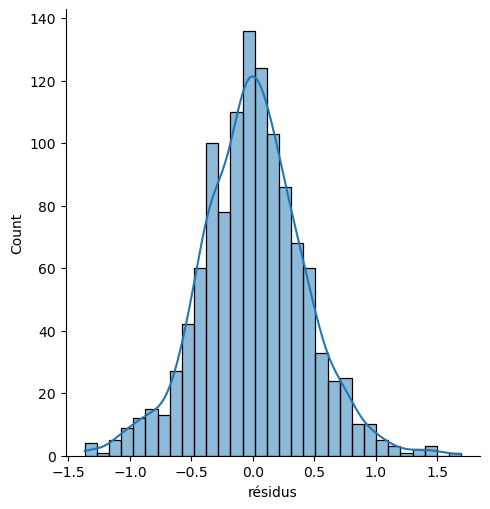

Kolmogorov p-value : 8.457669425051671e-47
H1 : Les résidus ne suivent pas une distribution normale.


Shapiro : 0.9932056069374084
p-valeur : 3.402492802706547e-05
Les résidus ne suivent pas une distribution normale.


Test de Breusch-Pagan : Statistique du test : 148.09597466542996, P-value : 3.394445728762048e-30
H1 : On constate une hétéroscédasticité.


Test de Durbin Watson: 2.0230462109117084
L'hypothèse nulle est retenue si la statistique a une valeur proche de 2(pas d'auto-corrélation linéaire).


Facteurs d'inflation de la variance (VIF) :         VIF
0  1.171731
1  1.317546
2  1.645780
3  3.478213
4  4.562063
On constate une multicollinéarité si le score est supérieur à 10.




In [31]:
residus_modele_multi = residus_mod(modele_reg_multiple)

### Représentation des résidus via un QQplot

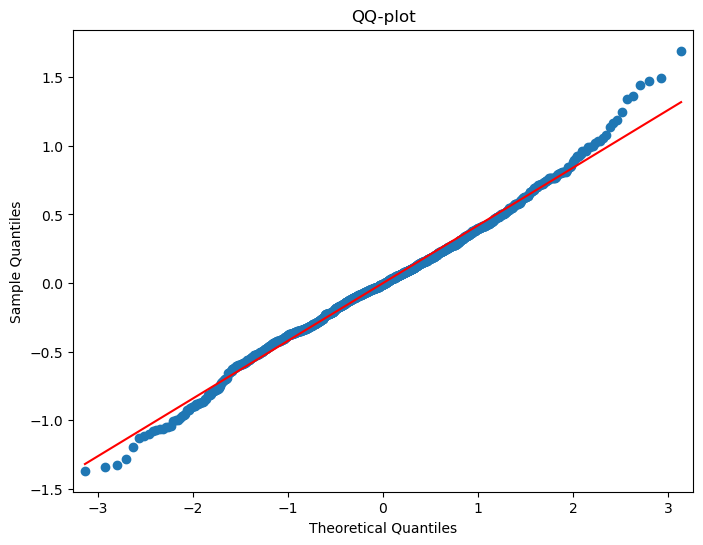

In [32]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residus_modele_multi, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()
fig.savefig('qqplot_1.png')

### Linéarité

<Figure size 1000x800 with 0 Axes>

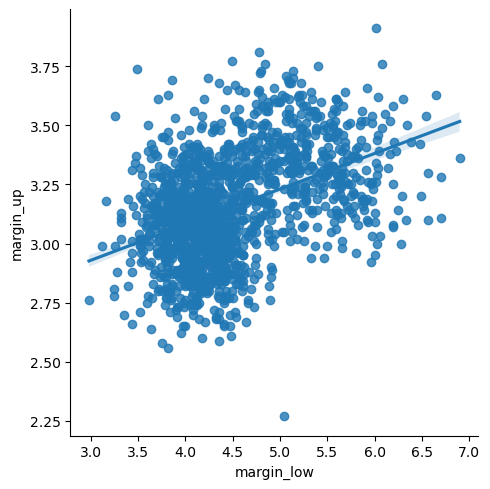

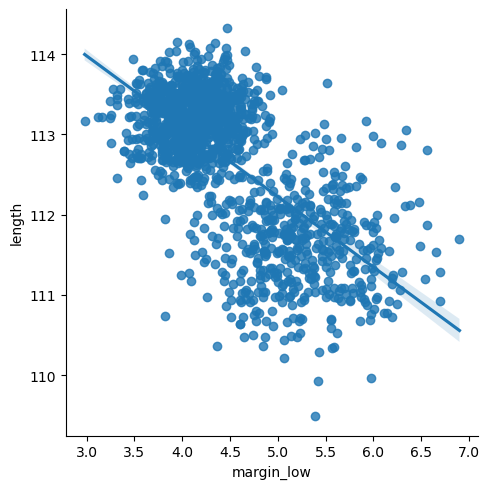

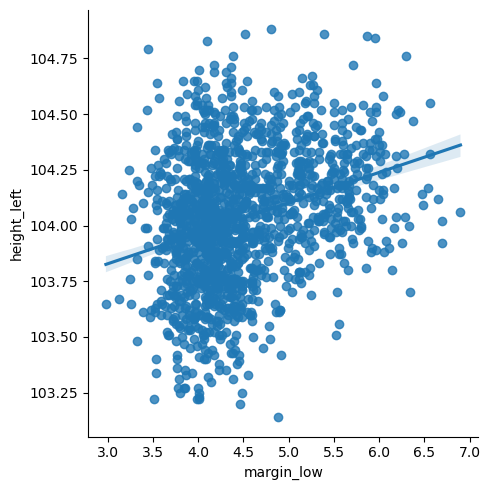

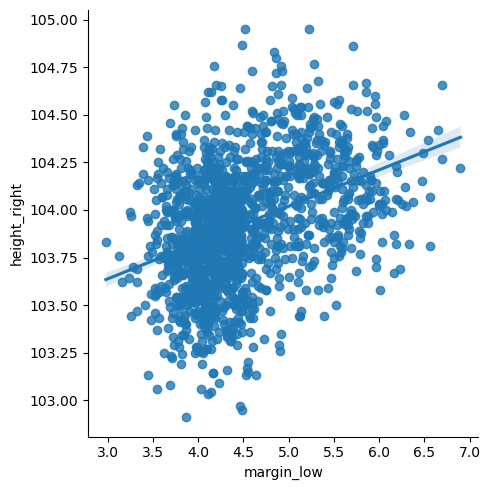

In [33]:
# Représenter les données du modèle de regression linéaire
fig = plt.figure(figsize=(10, 8))
sns.lmplot(x="margin_low", y="margin_up", data=billets_v2)
sns.lmplot(x="margin_low", y="length", data=billets_v2)
sns.lmplot(x="margin_low", y="height_left", data=billets_v2)
sns.lmplot(x="margin_low", y="height_right", data=billets_v2)
fig.savefig('reg_multi.png')

La linéarité est vérifiée pour chaque variable indépendante utilisée par rapport à la variable target (dépendante).

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Imputation</h3>
</div>

In [34]:
cond = billets[~billets.margin_low.isna()].index
non_cond = billets[billets.margin_low.isna()].index

# mettre une fontion pour la regression lineaire
def reg_lineaire_imputer(data, variables_explicatives, variable_cible, cond = cond) : 
    X = data[variables_explicatives]
    y = data[variable_cible]

    scaler = MinMaxScaler()
    X[variables_explicatives] = scaler.fit_transform(X)
    X = sm.add_constant(X)
    
    X_train = X.iloc[cond]
    y_train = y.iloc[cond]
    X_test  = X.iloc[non_cond]
    
    # Créer le modèle de régression linéaire
    regression_model = sm.OLS(y_train, X_train)
    modele_reg = regression_model.fit()

    y_pred = modele_reg.predict(X_test)
    
    return modele_reg, y_pred, X_train, X_test, y_train

In [35]:
modele_reg_impute, y_pred, X_train, X_test, y_train = \
reg_lineaire_imputer(billets, ['height_left', 'height_right', 'margin_up', 'length', 'is_genuine'], ['margin_low'])

In [36]:
# on le met dans un dataframe avec les mêmes index que dans billet
imputer = pd.DataFrame(y_pred, index = non_cond, columns=['margin_low'])
imputer.head()

margin_low
72     4.064416
99     4.110777
151    4.134782
197    3.986548
241    4.137794

In [37]:
# On met à jour notre data billets sur la variable margin_low
billets_full = billets
billets_full.update(imputer.margin_low)
print("Proportion billets vrais et faux : \n", billets_full.is_genuine.value_counts())
print('\n Données manquantes : \n', billets_full.isna().sum())

Proportion billets vrais et faux : 
 True     1000
False     500
Name: is_genuine, dtype: int64

 Données manquantes : 
 is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


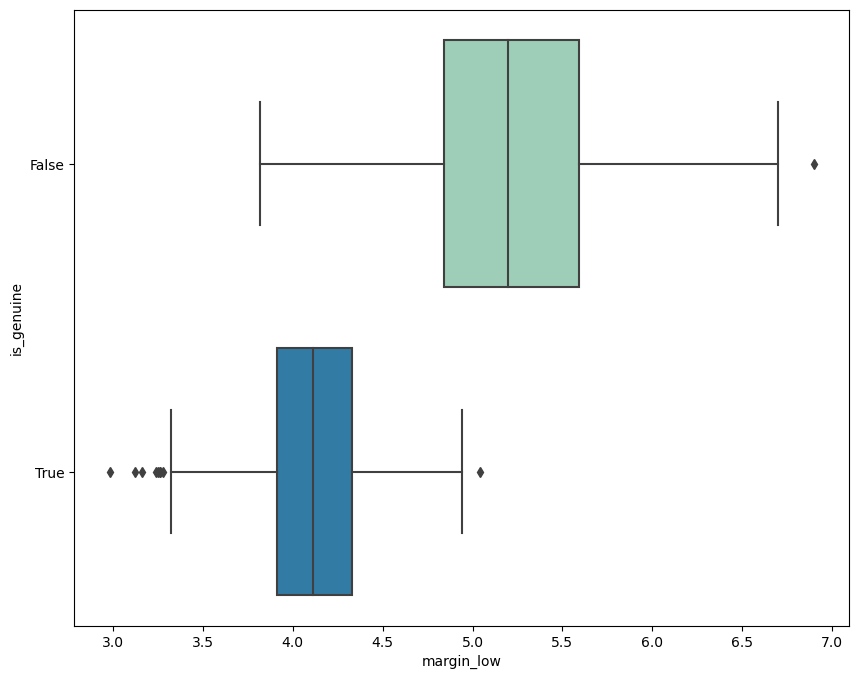

In [38]:
# Représentation variable margin_low avec données imputées
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=billets_full, x=billets_full.margin_low, y='is_genuine', orient='h', palette ='YlGnBu')
plt.show()
fig.savefig('distri_margin_low', dpi=300)

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III - ACP </h2>
</div>

On réalise une ACP dans le but de simplifier l'analyse. L'ACP permets de regrouper et donc de
réduire le nombre de variables selon leur similarité en perdant le moins d'information possible. 

In [39]:
# Importer les libraires 
from sklearn.decomposition import PCA
from matplotlib.collections import LineCollection

In [40]:
# Définir X
X = billets_full[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

In [41]:
# Fitter, normaliser et contrôler les données
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()
std_scale.fit(X)
X_scaled = pd.DataFrame(std_scale.transform(X), columns = X.columns)

In [42]:
# ACP
n_components = 6
pca = PCA()
df_pca = pca.fit_transform(X_scaled)

In [43]:
# On visualise les variances expliquées par composantes
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.59439123 1.01809069 0.78168348 0.70992615 0.58019716 0.31971396]
[0.43211027 0.16956866 0.13019373 0.11824214 0.09663506 0.05325014]


In [44]:
# Variance expliquée par composante et cumulée
composantes_var = pd.DataFrame({"Composante" : ["F" + str(x + 1) for x in range(6)], 
                   "Variance expliquée" : pca.explained_variance_,
                   "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
                   "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)})
composantes_var

Composante  Variance expliquée  % variance expliquée  % cum. var. expliquée
0         F1            2.594391                  43.0                   43.0
1         F2            1.018091                  17.0                   60.0
2         F3            0.781683                  13.0                   73.0
3         F4            0.709926                  12.0                   85.0
4         F5            0.580197                  10.0                   95.0
5         F6            0.319714                   5.0                  100.0

85% du dataset est expliqué par 4 composantes.

In [45]:
# On défini une variable avec la liste de nos composantes
n_components = 6
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

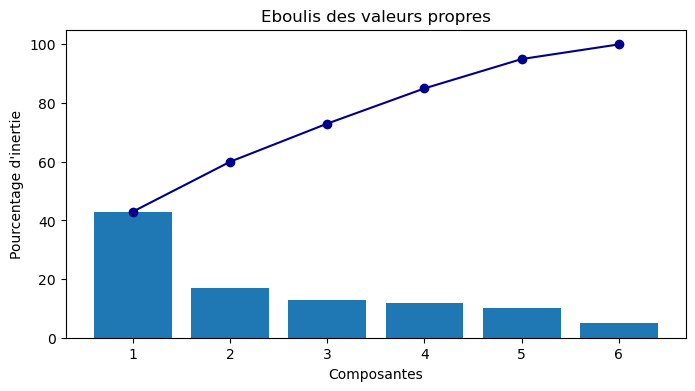

In [46]:
# Visualisation de l'éboulis
fig = plt.figure(figsize=(8, 4))
plt.bar(x_list, composantes_var['% variance expliquée'])
plt.plot(x_list, composantes_var['% cum. var. expliquée'],c="darkblue",marker='o')
plt.xlabel("Composantes")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
fig.savefig('Eboulis des valeurs propres.png')

In [47]:
# Visualiser les composantes dans un tableau
variables = billets_full[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].columns

pcs = pca.components_
pcs = pd.DataFrame(pcs)

pcs.columns = variables
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

round(pcs.T,3)

F1     F2     F3     F4     F5     F6
diagonal     -0.085  0.941 -0.287 -0.103 -0.117  0.008
height_left   0.331  0.307  0.885 -0.047  0.104  0.006
height_right  0.394  0.108 -0.166  0.866  0.234  0.004
margin_low    0.507 -0.073 -0.106 -0.090 -0.571  0.627
margin_up     0.439 -0.004 -0.271 -0.444  0.710  0.181
length       -0.528  0.049  0.150  0.177  0.302  0.758

In [48]:
# Créer le cercle de corrélation
def correlation_viz(pca, x,y, variables) : 
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 9))

    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                variables[i])
        
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    plt.axis('equal')
    plt.show(block=False)
    
    return fig

<Figure size 640x480 with 0 Axes>

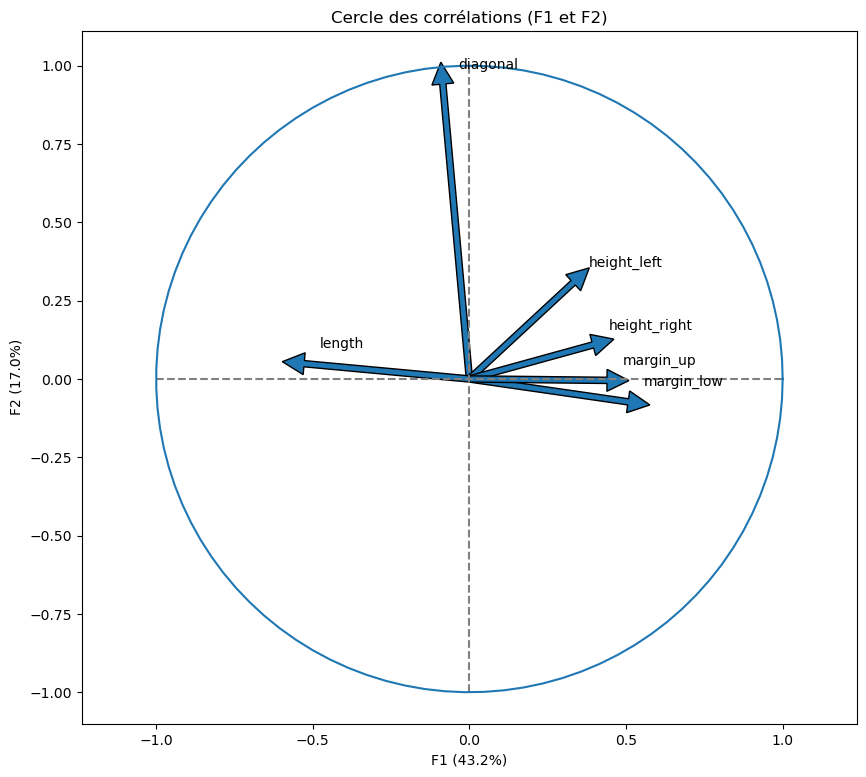

In [49]:
# Représenter le cercle des corrélations entre composante 1 et 2
fig = correlation_viz(pca, 0, 1, variables)
fig.savefig('cercles des corrélation F1 F2.png', dpi=300)

La composante 1 est majoritairement représentée par margin low, margin up qui sont elles même fortement correlées)
et length (corrélée négativement).
La composante 2 fait principalement référence à diagonal qui est tres bien représenté sur l'axe. Nous ne représenterons pas la composante 3 et 4.

In [50]:
# Transformation en DataFrame pandas
df_pca_X = pd.DataFrame({
    "F1" : df_pca[:,0], 
    "F2" : df_pca[:,1],
    "F3" : df_pca[:,2],
    "F4" : df_pca[:,3],
    "F5" : df_pca[:,4],
    "F6" : df_pca[:,5],
    "is_genuine" : billets_full["is_genuine"],
})

# Résultat (premières lignes)
df_pca_X.head()

F1        F2        F3        F4        F5        F6  is_genuine
0  1.647501  0.746561  2.393371  3.186240  0.304825 -0.011625        True
1 -2.019775 -2.206676 -1.002713  0.071000  0.036975 -0.474872        True
2 -0.968884  2.619483  1.201890 -0.921651 -0.837257  0.196845        True
3 -1.375709 -1.817960  0.646603  0.830834  0.803615 -0.225011        True
4  0.150229 -0.566330  0.853899 -1.784465  1.185042 -0.291196        True

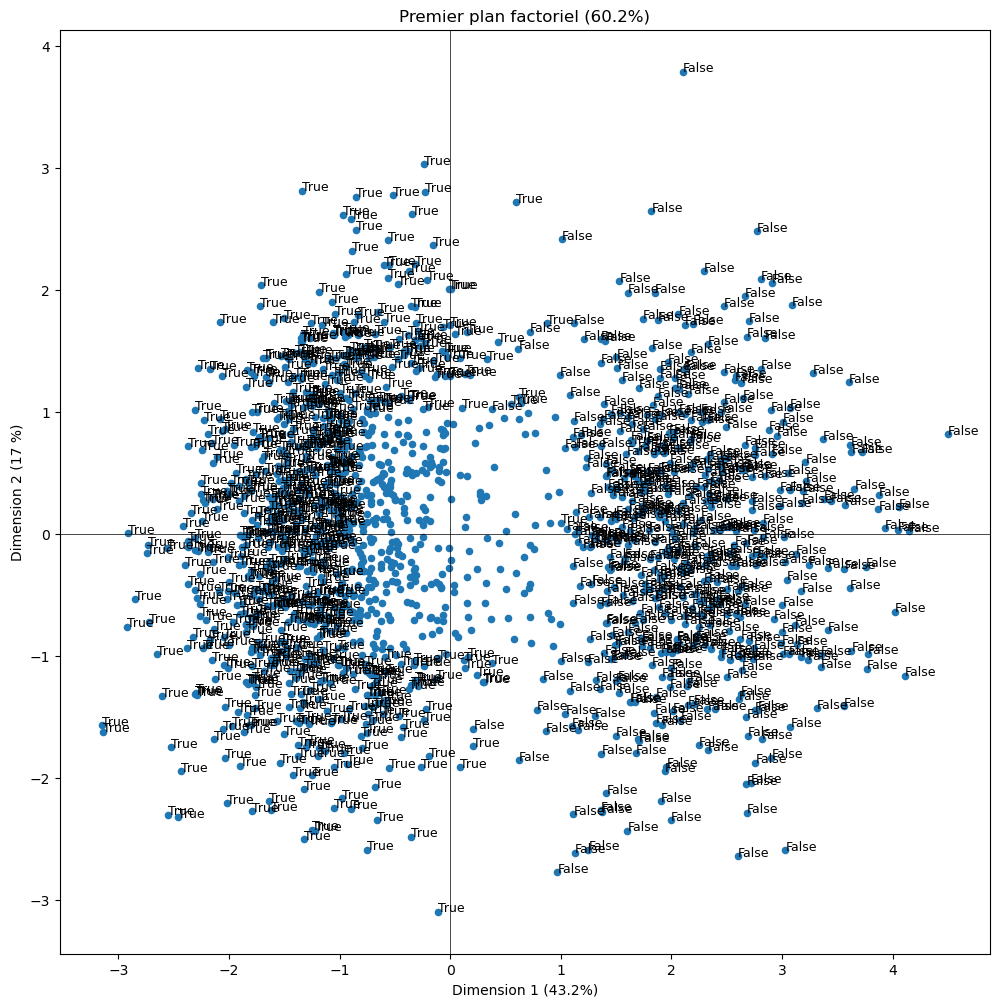

In [51]:
# Représenter les individus sur le plan factoriel (composante 1 et 2)
fig = plt.figure
fig, ax = plt.subplots(figsize=(12, 12))
df_pca_X.plot.scatter("F1", "F2", ax = ax)

for k in df_pca_X.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['F1']) > 1) | (abs(k[1]['F2']) > 1):
        ax.annotate(k[1]["is_genuine"], (k[1]['F1'], k[1]['F2']), fontsize = 9)

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
plt.xlabel("Dimension 1 (43.2%)") 
plt.ylabel("Dimension 2 (17 %)")
plt.title("Premier plan factoriel (60.2%)")
plt.show()
fig.savefig("Premier plan factoriel.png", dpi=300)

Sur ce plan factoriel, on constate presque une séparation nette entre les vrais et les faux billets.

In [52]:
# Ajouter les 6 PCA au df
for i in range(0, 6): 
    billets_full['PC' + str(i + 1)] = df_pca[:, i]
billets_full

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length       PC1       PC2       PC3       PC4       PC5       PC6  
0     112.83  1.647501  0.746561  2.393371  3.186240  0.304825 -0.011625  
1     113.09 -2.019775 -2.206676 -1.002713  0.071000  0.036975 -0.474872  
2     113.16 -0.968884  2.619483  1.201890 -0.921651 -0.837257  0.196845  
3     113.51 -1.375709 -1.817960  0.646603  0.830834  0.803615 -0.225011  
4     112.54  0.150229 -0.566330  0.853899 -1.784465  1.185042 -0.291196  
...      ...       ...       ...       ...       ...       ...       ...  
1495  111.28  1.428762 -0.270298  0.946179  0.521656 -0.236174 -1.317997  
1496  110.97  3.280796  1.317053  0.615568  0.337035 -0.109586 -0.541750  
1497  111.95  1.888672 -0.600702 -0.545568 -0.100189 -0.304141  0.503581  
1498  112.25  1.789668  0.510998  0.028130 -0.473989  0.350461  0.530586  
1499  112.07  1.042972 -1.471378  0.482767 -0.683887  0.489028 -0.229696  

[1500 rows x 13 columns]

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">IV - KMeans </h2>
</div>

On effectue un clustering sur les données d'origine et sur les données de l'ACP pour voir
si les clusters vont être cohérents et pour voir quelle sera la proportion de vrais faux et inversement (prédiction). 

Effectuer des clustering sur les données réduites et d'origine nous permettra de comparer nos modèles pour selectionner le plus performant.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Kmeans sur données d'origine</h3>
</div>

In [53]:
# Effectuer un train test
X_train, X_test, y_train, y_test =\
train_test_split(billets_full[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']],
                 billets_full[['is_genuine']], random_state=0, test_size=0.20)

In [54]:
# Fonction pour le Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette(data, nbre = 10) :
    inertie = []
    silhouettes = []
    K = range(2, nbre)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(data)
        inertie.append(kmeanModel.inertia_)
        silhouettes.append(silhouette_score(data, kmeanModel.labels_))
    
    return inertie, silhouettes
# On entraine le modèle
inertie, silhouettes = silhouette(X_train, 10)

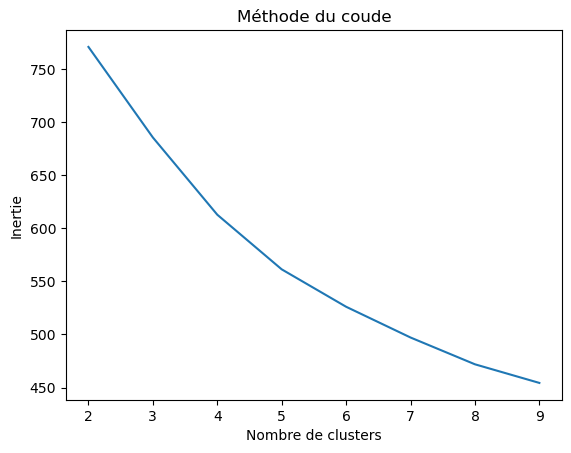

In [55]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
fig = plt.figure()
plt.plot(range(2, 10), inertie)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()
fig.savefig('Elbow.png')

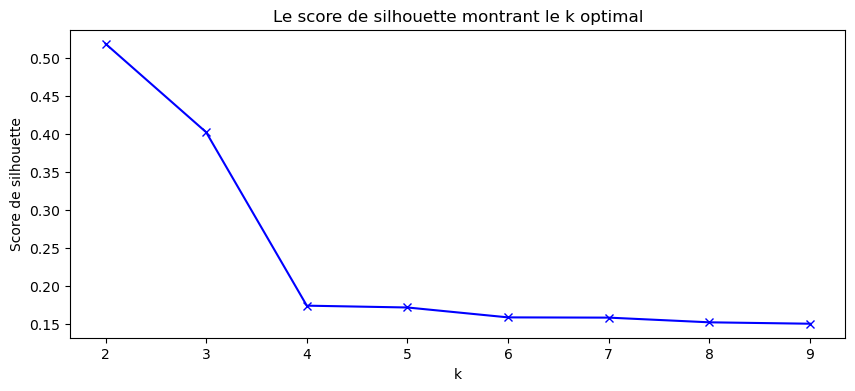

In [56]:
# Graphique du score de silhouette
fig = plt.figure(figsize=(10,4))
plt.plot(range(2, 10), silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()
fig.savefig('Silhouette_kmeans.png')

In [57]:
# Appliquer KMeans avec le nombre de clusters selon variable cible 'is_genuine'
kmeans_original = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_train['cible_kmeans_ori'] = kmeans_original.labels_

In [58]:
# Prediction sur les données test avec notre kmeans
y_test['cible_kmeans_ori'] =  kmeans_original.fit_predict(X_test)
pd.crosstab(y_test['is_genuine'], y_test['cible_kmeans_ori']==1)

cible_kmeans_ori  False  True 
is_genuine                    
False                94      3
True                  0    203

In [59]:
# Homogénéité et variance des clusters
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import calinski_harabasz_score

y1_pred = kmeans_original.fit_predict(X_test)
y1_true = y_test.is_genuine

print("Homogeneity score:", round(homogeneity_score(y1_true, y1_pred),3))

print("Calinski Harabasz Score :", round(calinski_harabasz_score(X_test, y1_pred),3))

Homogeneity score: 0.917
Calinski Harabasz Score : 394.908


**L'homogénéité des clusters est presque parfaite et la séparation entre clusters est bonne aussi.**

In [60]:
# Ajouter Kmeans au dataset
billets_full['cible_kmeans_ori'] = kmeans_original.fit(billets_full[['diagonal', 'height_left',
                                                                     'height_right', 'margin_low', 
                                                                     'margin_up', 'length']]).labels_

In [61]:
# Visualiser les caractéristiques de chaque cluster (centroïdes)
cluster_stats_org = billets_full.groupby('cible_kmeans_ori')[billets_full[['diagonal', 'height_left',
                                                                     'height_right', 'margin_low', 
                                                                     'margin_up', 'length']].columns].mean()
round(cluster_stats_org,2)

diagonal  height_left  height_right  margin_low  margin_up  \
cible_kmeans_ori                                                               
0                   171.99       103.95        103.81        4.12       3.06   
1                   171.90       104.19        104.15        5.24       3.35   

                  length  
cible_kmeans_ori          
0                 113.20  
1                 111.59

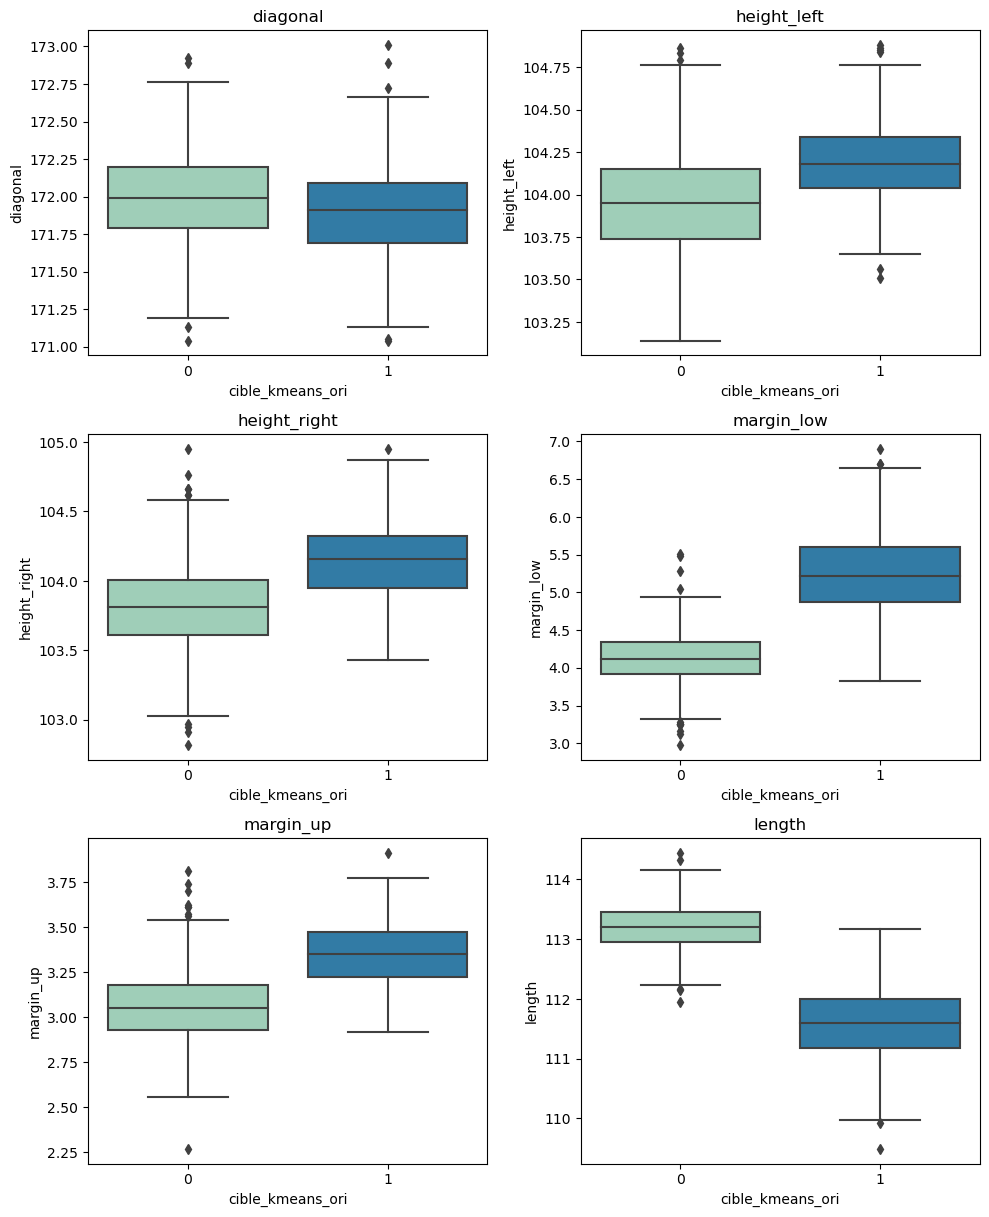

In [62]:
# Représenter la composition des clusters par des Boxplot par variables
num_cols = len(billets_full.columns) # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

fig = plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(billets_full[['diagonal', 'height_left',
                                         'height_right', 'margin_low',
                                         'margin_up', 'length']].columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=billets_full.cible_kmeans_ori, y=column, data=X, palette='YlGnBu')
    plt.title(column)

plt.tight_layout()
plt.show()
fig.savefig('boxplot_k.png', dpi=300)

In [63]:
# Predictions sur l'ensemble du dataset
pd.crosstab(billets_full['is_genuine'], billets_full['cible_kmeans_ori']==0)

cible_kmeans_ori  False  True 
is_genuine                    
False               481     19
True                  2    998

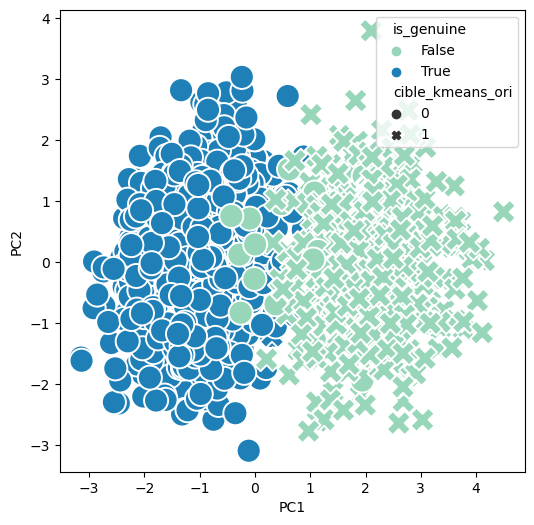

In [64]:
# Représenter les clusters
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=billets_full, x='PC1', y='PC2', hue='is_genuine', style='cible_kmeans_ori', s=300, palette='YlGnBu')
plt.show()
fig.savefig("kmeans_cluster1.png")

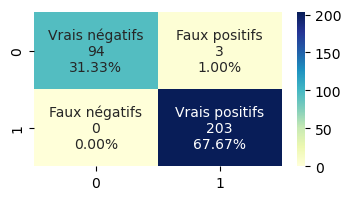

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        97
        True       0.99      1.00      0.99       203

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [65]:
def matrice_confusion(a, b):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='YlGnBu')
    plt.show()
    
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)

fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test['is_genuine'], y_test['cible_kmeans_ori']==1)
fig.savefig('matrice_kmeans_ori.png')

Les scores sont très bons. La précision est à 100 et 99% ce qui est un très bon résultat.
La sensibilité est à 97% sur les faux billets et 100% sur les vrais billets. 
Or ce sont les faux billets qui représentent un coût plus conséquent. 

**Il faudrait augmenter la sensibilité pour améliorer le modèle.**

In [66]:
# Stocker predictions dans variable
y_test_ori = y_test

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Kmeans sur les Composantes Principales</h3>
</div>

In [67]:
#Recuperer les composantes et effectuer un train test
X_train, X_test, y_train, y_test =\
train_test_split(billets_full.filter(like='PC'), billets_full[['is_genuine']], random_state=0, test_size=0.20)

On prends les données d'apprentissage et on prend **K = 2**

In [68]:
# Appliquer KMeans sur les données train
kmeans_acp = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_train['cible_kmeans_acp'] = kmeans_acp.labels_

In [69]:
# Prédiction sur données test
y_test['cible_kmeans_acp'] =  kmeans_acp.fit_predict(X_test)
pd.crosstab(y_test['is_genuine'], y_test['cible_kmeans_acp']==1)


cible_kmeans_acp  False  True 
is_genuine                    
False                94      3
True                  5    198

In [70]:
# Homogénéité et variance des clusters
y1_pred = kmeans_acp.fit_predict(X_test)
y1_true = y_test.is_genuine

print("Homogeneity score:", round(homogeneity_score(y1_true, y1_pred),3))

print("Calinski Harabasz Score :", round(calinski_harabasz_score(X_test, y1_pred),3))

Homogeneity score: 0.813
Calinski Harabasz Score : 147.579


**Les scores ont été dégradés avec l'ACP.**

In [71]:
# Ajouter les données au dataset
billets_full['cible_kmeans_acp'] = kmeans_acp.fit(billets_full.filter(like='PC')).labels_

In [72]:
# Visualiser les caractéristiques de chaque cluster
cluster_stats = billets_full.groupby('cible_kmeans_acp')[billets_full[['diagonal', 'height_left',
                                                                       'height_right', 'margin_low',
                                                                       'margin_up', 'length']].columns].mean()
round(cluster_stats,2)

diagonal  height_left  height_right  margin_low  margin_up  \
cible_kmeans_acp                                                               
0                   171.99       103.95        103.81        4.12       3.05   
1                   171.90       104.20        104.15        5.22       3.35   

                  length  
cible_kmeans_acp          
0                 113.20  
1                 111.63

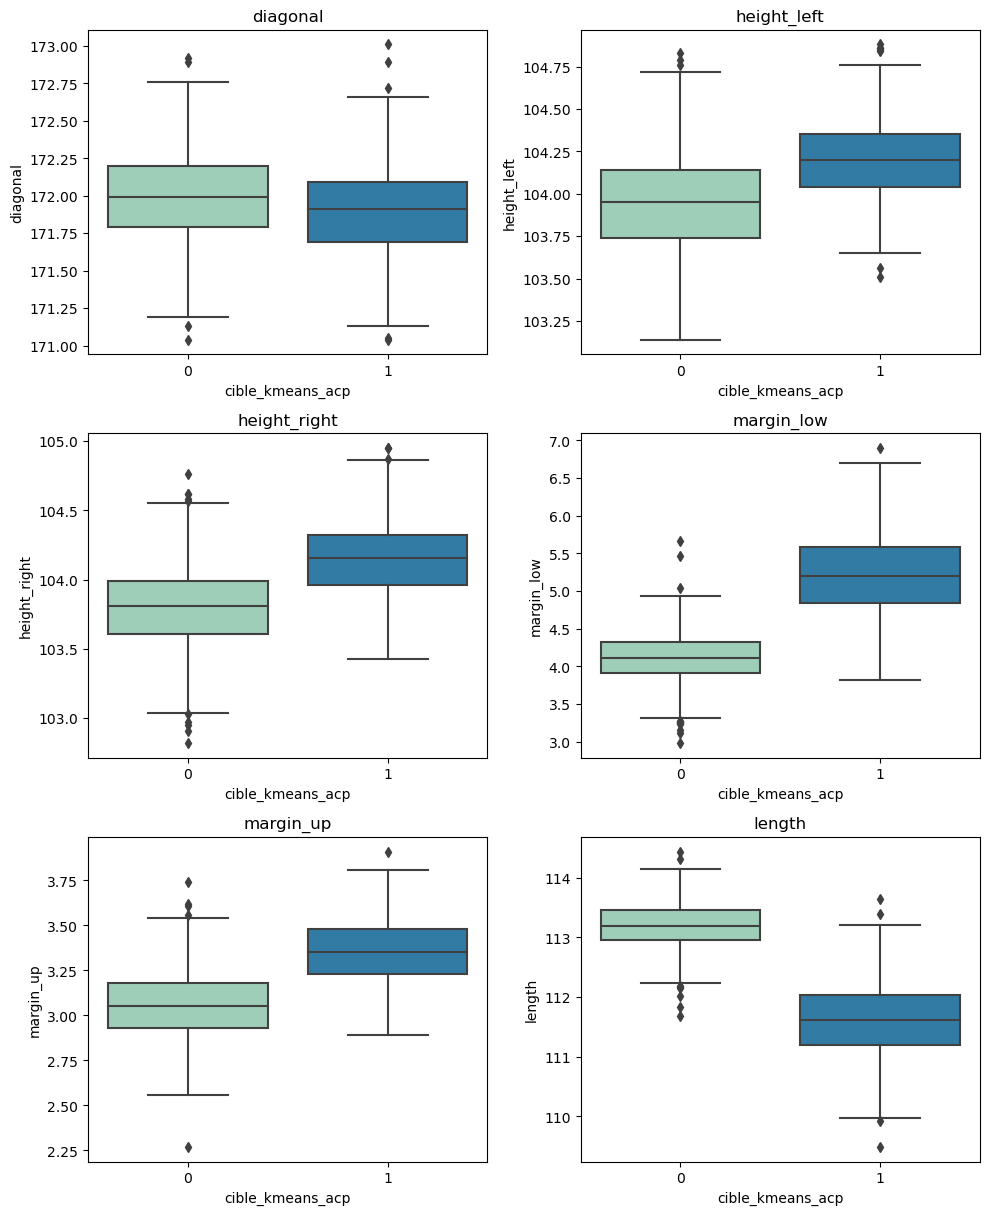

In [73]:
# Représenter la composition des clusters par des Boxplot par variables
num_cols = len(billets_full.columns) # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

fig = plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(billets_full[['diagonal', 'height_left','height_right',
                                          'margin_low', 'margin_up','length']].columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=billets_full.cible_kmeans_acp, y=column, data=X, palette='YlGnBu')
    plt.title(column)

plt.tight_layout()
plt.show()
fig.savefig('boxplot_k2.png', dpi=300)

In [74]:
# Matrice de confusion sur l'ensemble du dataset
pd.crosstab(billets_full['is_genuine'], billets_full['cible_kmeans_acp']==0)

cible_kmeans_acp  False  True 
is_genuine                    
False               486     14
True                 10    990

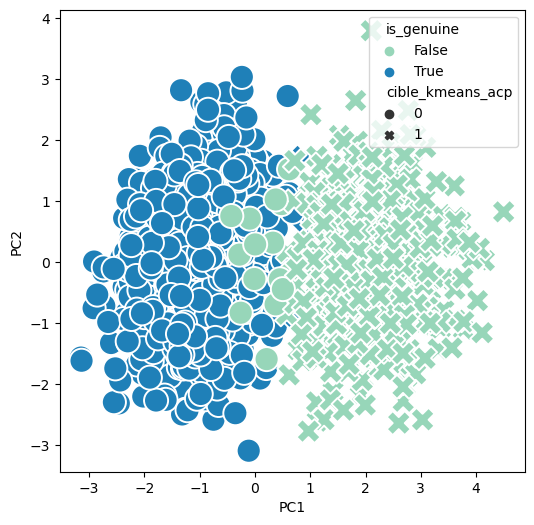

In [75]:
# Représenter les clusters
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=billets_full, x='PC1', y='PC2', hue='is_genuine', style='cible_kmeans_acp', s=300, palette='YlGnBu')
plt.show()
fig.savefig("kmeans_cluster2.png")

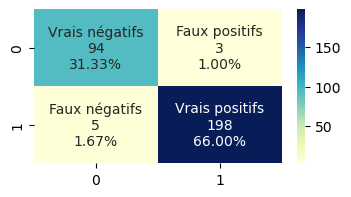

              precision    recall  f1-score   support

       False       0.95      0.97      0.96        97
        True       0.99      0.98      0.98       203

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [76]:
# Matrice de confusion 
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test['is_genuine'], y_test['cible_kmeans_acp']==1)
fig.savefig('matrice_Kmeans_ACP.png')

**La précision a baissé.**

En revanche, la sensibilité est passée à 97% sur les faux billets ce qui représente une amélioration 
par rapport au clustering sur les données d'origine.

**Ce modèle n'est pas satisfaisant.**

Effectuons une regression logistique pour la detection de faux billets que nous mettrons en concurrence avec les modèles Kmeans effectué précédemment.

In [77]:
# Stocker predictions dans variable
y_test_acp = y_test

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">IV - Régression Logistique </h2>
</div>

La régression logistique est l'un des algorithmes d'apprentissage automatique
les plus couramment utilisés pour les problèmes de classification binaire.
Le but de la régression logistique est d'estimer les probabilités des événements
et de déterminer une relation entre les caractéristiques et les probabilités de résultats particuliers.
Dans notre cas, nous cherchons à prédire le taux de vrais (1) et de faux billets(0) représenté par la variable is_genuine (binaire) sur notre jeu de données. Le modèle de régression logistique est alors parfaitement adapté pour notre problématique.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Régression logistique simple</h3>
</div>

In [78]:
# Effectuer la regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def reg_logistique(data, var_explicatives, var_cible):
    y = data[var_cible]
    X = data[var_explicatives]

    # Ajouter une constante dans notre modèle
    X = sm.add_constant(X)

    # Diviser les données en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Créer le modèle de régression logistique
    logit_model = sm.Logit(y_train, X_train)
    
    # Ajuster le modèle aux données d'apprentissage
    reg_simple = logit_model.fit()
    
    # les predictions en train et test 
    y_pred_train = reg_simple.predict(X_train)
    y_pred_test  = reg_simple.predict(X_test)

    # Calculer les métriques d'évaluation du modèle pour le train
    accuracy_train = accuracy_score(y_train[var_cible], y_pred_train.round())
    precision_train = precision_score(y_train[var_cible], y_pred_train.round())
    recall_train = recall_score(y_train[var_cible], y_pred_train.round())
    f1_train = f1_score(y_train[var_cible], y_pred_train.round())
    auc_train = roc_auc_score(y_train, y_pred_train)
    
    # Calculer les métriques d'évaluation du modèle pour le test
    accuracy_test = accuracy_score(y_test[var_cible], y_pred_test.round())
    precision_test = precision_score(y_test[var_cible], y_pred_test.round())
    recall_test = recall_score(y_test[var_cible], y_pred_test.round())
    f1_test = f1_score(y_test[var_cible], y_pred_test.round())
    auc_test = roc_auc_score(y_test, y_pred_test)
    
    return reg_simple, y_pred_train, y_pred_test,  X_train, y_train, X_test, y_test

In [79]:
modele_logit_simple, y_pred_train_log_simple, y_pred_test_log_simple, X_train, y_train, X_test, y_test =\
                    reg_logistique(billets_full, ['length'], ['is_genuine'])

Optimization terminated successfully.
         Current function value: 0.132587
         Iterations 10


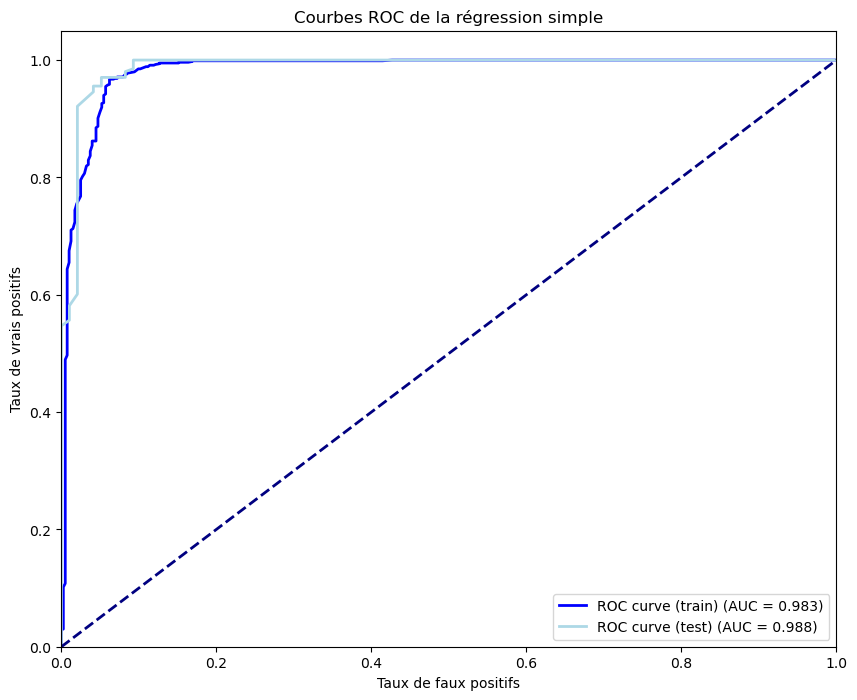

In [80]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_log_simple)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_log_simple)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
fig = plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (train) (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='lightblue', lw=2, label='ROC curve (test) (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de la régression simple')
plt.legend(loc="lower right")
plt.show()
fig.savefig('reg_simple_roc.png')

La courbe ROC évalue l'exactitude des prédictions d'une modèle en traçant :  
**la sensibilité** (ou TPR ou rappel : proportion d'individus positifs effectivement bien détectés par le classifieur)   
par rapport à **la spécificité** (ou TNR : proportion d'individus négatifs effectivement bien détectés par le test).   

Un bon modèle est celui qui permettra d'améliorer la spécificité sans dégrader la sensiblité.  
L'AUC (Aire sous la courbe ROC) est la mesure associée à la courbe.

**Au vu des AUC de train et de test, le modèle ne semble pas avoir sur-appris.**

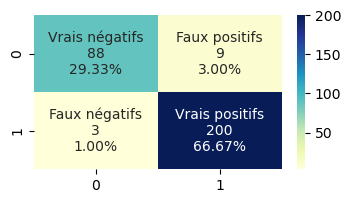

              precision    recall  f1-score   support

       False       0.97      0.91      0.94        97
        True       0.96      0.99      0.97       203

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300



In [81]:
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test, y_pred_test_log_simple.round())
fig.savefig('matrice_reg_log_simple.png')

Avec une regression logistique simple, la précision est à 97 et 96% et la
sensibilité sur les faux billets est de 91%. 

**L'AUC est bonne mais couplé aux résultats de precision, recall et f1-score, on souhaite tout de même améliorer le modèle car les résultats sont plutôt faibles.**

Effectuons une regression logistique multiple pour comparer ce modèle avec nos résultats précédents. 

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Régression logistique multiple
</h3>
</div>

La régression multiple prends plus de variables explicatives en entrée. 
Théoriquement nous devrions donc améliorer notre modèle. 

En tout cas, nous pourrons comparer nos résultats à ceux des Kmeans et de la régression simple afin de choisir le modèle le plus robuste.

In [82]:
modele_logit_multiple, y_pred_train_log_multi, y_pred_test_log_multi, X_train, y_train, X_test, y_test =\
                reg_logistique(billets_full, ['diagonal', 'height_left', 'height_right',
                                              'margin_low', 'margin_up', 'length'], ['is_genuine'])

Optimization terminated successfully.
         Current function value: 0.029654
         Iterations 12


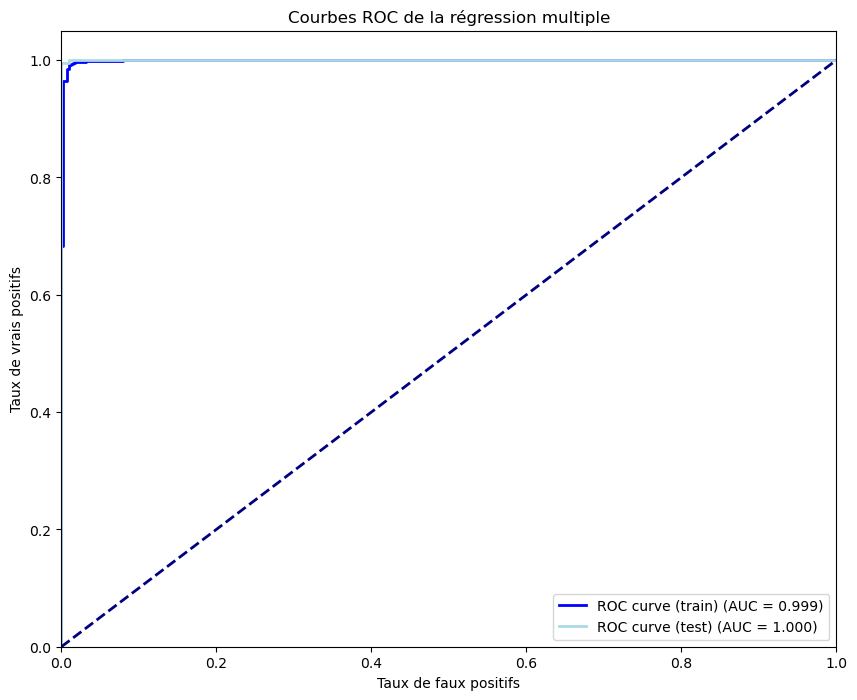

In [83]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_log_multi)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_log_multi)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
fig = plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (train) (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='lightblue', lw=2, label='ROC curve (test) (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de la régression multiple')
plt.legend(loc="lower right")
plt.show()
fig.savefig('reg_multi_roc.png')

L'AUC train et test ont eux aussi été améliorés en comparaison du score de la régression simple. **Il n'y a pas de surapprentissage.**

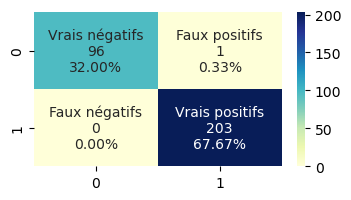

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        97
        True       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [84]:
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test, y_pred_test_log_multi.round())
fig.savefig('matrice_reg_log_simple.png')

La précision est passée de 96 et 97% à 100% et la sensibilité sur les faux billets est passée de 91% à 99%, ce qui est excellent.   
**Le modèle a été amélioré avec la régression multiple et semble être meilleur que le kmeans sur les données d'origine.**  
On a vu précédemment que des variables étaient fortement correlées a notre variable cible.    Nous allons donc realiser une ACP afin de supprimer la collinéarité constatée pour que notre modèle soit meilleur.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Régression logistique multiple sur les composantes principales
</h3>
</div>

In [85]:
modele_logit_multiple_acp, y_pred_train_log_multi_acp, y_pred_test_log_multi_acp, X_train, y_train, X_test, y_test =\
                reg_logistique(billets_full, ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], ['is_genuine'])
modele_logit_multiple_acp.summary2()

Optimization terminated successfully.
         Current function value: 0.029654
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.954   
Dependent Variable: is_genuine       AIC:              85.1698 
Date:               2024-03-30 09:05 BIC:              120.8003
No. Observations:   1200             Log-Likelihood:   -35.585 
Df Model:           6                LL-Null:          -765.88 
Df Residuals:       1193             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const    2.1310     0.3884    5.4872   0.0000    1.3699    2.8922
PC1     -5.9397     0.7745   -7.6689   0.0000   -7.4577   -4.4217
PC2      0.3527     0.3419    1.0315   0.3023   -0.3174    1.0228
PC3      1.4382     0.4579    3.1408   0.0017    0.5407    2.3357
PC4      1.4182     0.4597    3.0850   0.0020    0.5172    2.3191
PC5      1.4681     0.5059    2.9021   0.0037    0.4766    2.4596
PC6      0.9868     0.5690    1.7342   0.0829   -0.1284    2.1021
===============================================================

"""

Les composantes **2 et 6** n'apportent rien de plus, elles ne sont **pas significatives** car pvalue > 0.05, nous les retirerons donc de notre analyse.

In [86]:
modele_logit_multiple_acp, y_pred_train_log_multi_acp, y_pred_test_log_multi_acp, X_train, y_train, X_test, y_test =\
                reg_logistique(billets_full, ['PC1',  'PC3', 'PC4', 'PC5'], ['is_genuine'])
modele_logit_multiple_acp.summary2()

Optimization terminated successfully.
         Current function value: 0.031245
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.951   
Dependent Variable: is_genuine       AIC:              84.9889 
Date:               2024-03-30 09:05 BIC:              110.4393
No. Observations:   1200             Log-Likelihood:   -37.494 
Df Model:           4                LL-Null:          -765.88 
Df Residuals:       1195             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const    2.2438     0.3889    5.7690   0.0000    1.4815    3.0061
PC1     -5.9800     0.7507   -7.9660   0.0000   -7.4513   -4.5087
PC3      1.4841     0.4455    3.3313   0.0009    0.6109    2.3572
PC4      1.3861     0.4227    3.2794   0.0010    0.5577    2.2145
PC5      1.4985     0.5099    2.9387   0.0033    0.4991    2.4979
===============================================================

"""

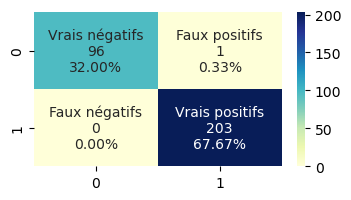

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        97
        True       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [87]:
# Matrice de confusion sur le test
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test, y_pred_test_log_multi_acp.round())

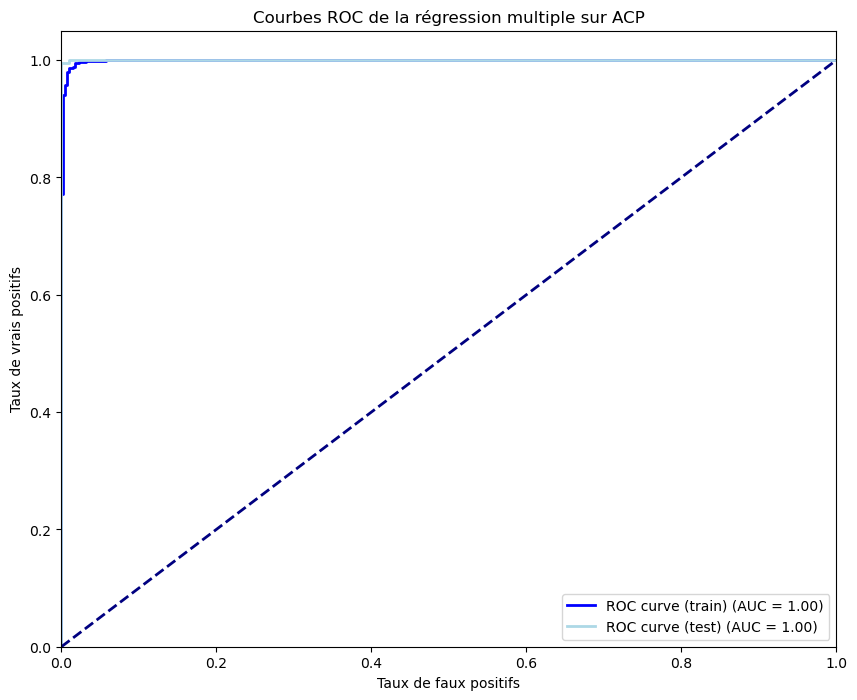

In [88]:
# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_log_multi_acp)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_log_multi_acp)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
fig = plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='lightblue', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de la régression multiple sur ACP')
plt.legend(loc="lower right")
plt.show()
fig.savefig('reg_multi_acp_roc.png')

**Le modèle est similaire à celui effectué avec la regréssion multiple mais dans cette version la corrélation entre variables a été supprimée grâce à l'ACP.**

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">VI - Choix du modèle </h2>
</div>

Nous pouvons désormais comparer les resultats de tous nos modèles afin de choisir
le meilleur qui sera utilisé pour la création de l'algorithme de détection de faux billets.

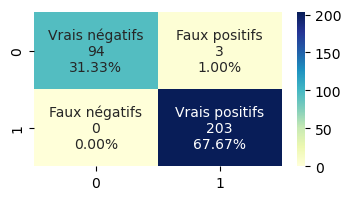

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        97
        True       0.99      1.00      0.99       203

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [89]:
# Kmeans sur données d'origine
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test['is_genuine'], y_test_ori.cible_kmeans_ori)

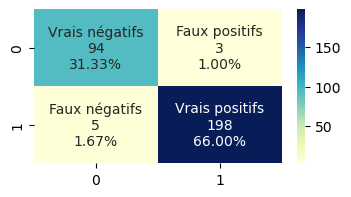

              precision    recall  f1-score   support

       False       0.95      0.97      0.96        97
        True       0.99      0.98      0.98       203

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [90]:
# Kmeans sur ACP
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test['is_genuine'], y_test_acp.cible_kmeans_acp)

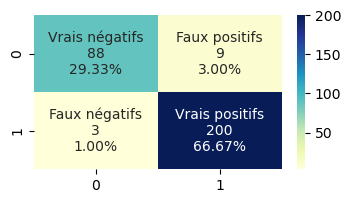

              precision    recall  f1-score   support

       False       0.97      0.91      0.94        97
        True       0.96      0.99      0.97       203

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300



In [91]:
# Regression logistique simple
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test, y_pred_test_log_simple.round())

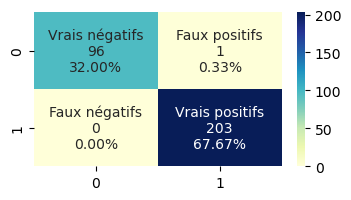

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        97
        True       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [92]:
# Regression logistique multiple
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test, y_pred_test_log_multi.round())

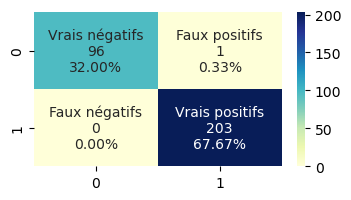

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        97
        True       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [93]:
# Régression logistique sur les données d'acp
fig = plt.figure(figsize=(4,2))
matrice_confusion(y_test, y_pred_test_log_multi_acp.round())

Le modèle le plus **robuste et performant** semble etre celui réalisé avec **la régression logistique multiple sur ACP**. Il est similaire au modèle effectué avec la regression multiple sur les variables explicatives mais l'ACP nous a permis de supprimer la corrélation entre les variables au moyen des composantes principales.

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">VII - Performance et robustesse du modèle choisi</h2>
</div>

Dans un premier temps on detectera si un overfitting ou underfitting a eu lieu en analysant les performances du modèle sur les données d'entraînement et de test.

Par la suite, on vérifiera la robustesse et la stabilité du modèle avec la validation croisée.

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Apprentissage du modèle
</h3>
</div>

In [94]:
# Calculer AUC
train_auc = roc_auc_score(y_train, y_pred_train_log_multi_acp)
test_auc  = roc_auc_score(y_test,  y_pred_test_log_multi_acp)

print(f"Le score AUC sur le train set    ----> {train_auc}")
print(f"Le score AUC sur le test set     ----> {test_auc}")

Le score AUC sur le train set    ----> 0.9989476666531752
Le score AUC sur le test set     ----> 0.9999492153775837


Les scores de prédiction des datasets train et test sont assez rapprochés, il ne semble pas y avoir 
eu de surapprentissage ni de sous apprentissage. Ces scores représentent l'aire sous la courbe ROC.

Par exemple, si le modèle fonctionnait avec une précision de 99 % sur l’ensemble de données d'entrainement, mais seulement de 50 à 55 % sur l’ensemble de données de test. L'écart significatif entre ces deux scores indiquerait qu'un overfitting a eu lieu.

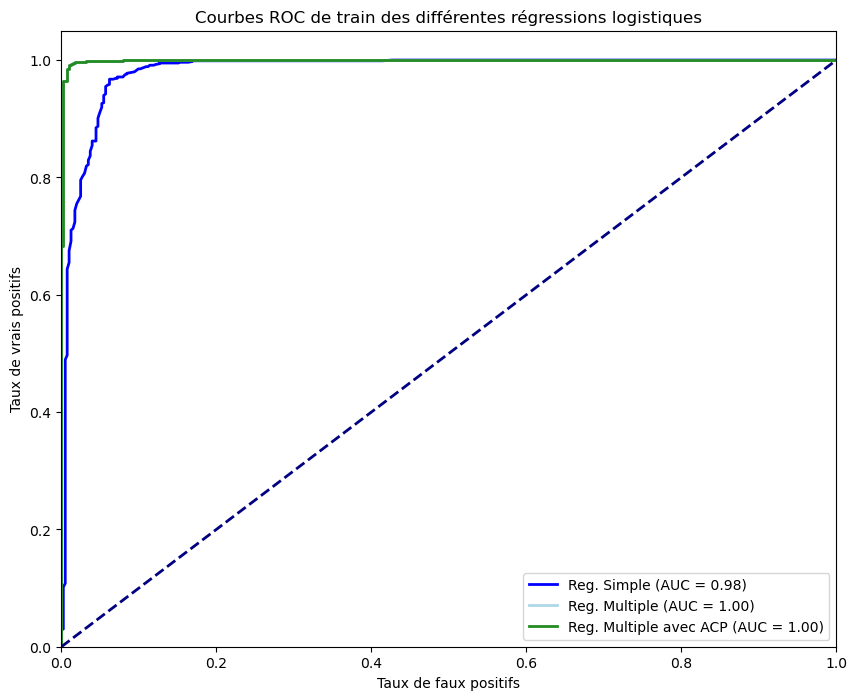

In [95]:
## logit simple
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_log_simple)
roc_auc_train = auc(fpr_train, tpr_train)

## logit multiple
fpr_train_m, tpr_train_m, thresholds_train = roc_curve(y_train, y_pred_train_log_multi)
roc_auc_train_m = auc(fpr_train_m, tpr_train_m)

## logit multiple sur les composantes
fpr_train_acp, tpr_train_acp, thresholds_train = roc_curve(y_train, y_pred_train_log_multi_acp)
roc_auc_train_acp = auc(fpr_train_acp, tpr_train_acp)

# Tracer les courbes ROC
fig = plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Reg. Simple (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_train_m, tpr_train_m, color='lightblue', lw=2, label='Reg. Multiple (AUC = %0.2f)' % roc_auc_train_m)
plt.plot(fpr_train_m, tpr_train_m, color='forestgreen', lw=2, label='Reg. Multiple avec ACP (AUC = %0.2f)' % roc_auc_train_acp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de train des différentes régressions logistiques')
plt.legend(loc="lower right")
plt.show()
fig.savefig('courbes_roc_train.png')

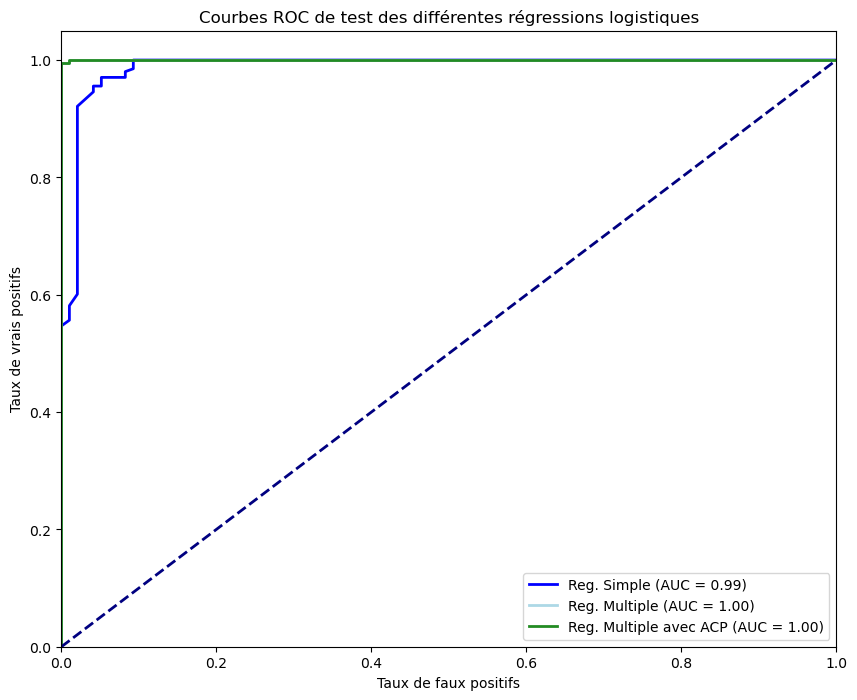

In [96]:
## logit simple
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_log_simple)
roc_auc_test = auc(fpr_test, tpr_test)

## logit multiple
fpr_test_m, tpr_test_m, thresholds_test = roc_curve(y_test, y_pred_test_log_multi)
roc_auc_test_m = auc(fpr_test_m, tpr_test_m)

## logit multiple sur les composantes
fpr_test_acp, tpr_test_acp, thresholds_test = roc_curve(y_test, y_pred_test_log_multi_acp)
roc_auc_test_acp = auc(fpr_test_acp, tpr_test_acp)

# Tracer les courbes ROC
fig = plt.figure(figsize=(10, 8))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Reg. Simple (AUC = %0.2f)' % roc_auc_test)
plt.plot(fpr_test_m, tpr_test_m, color='lightblue', lw=2, label='Reg. Multiple (AUC = %0.2f)' % roc_auc_test_m)
plt.plot(fpr_test_m, tpr_test_m, color='forestgreen', lw=2, label='Reg. Multiple avec ACP (AUC = %0.2f)' % roc_auc_test_acp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de test des différentes régressions logistiques')
plt.legend(loc="lower right")
plt.show()
fig.savefig('courbes_roc_test.png')

**La régression logistique multiple a amélioré le modèle, celle sur les composantes principales n'a pas amélioré les scores du modèle mais la corrélation a été supprimée grâce à l'ACP, le modèle aura donc de meilleurs résultats.**

<div style=" background-color: RGB(162, 115, 235);" >
<div style="border: 1px solid RGB(162, 115, 235);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Validation croisée
</h3>
</div>

La validation croisée permet d'évaluer la performance et la fiabilité du modèle d'apprentissage.
Ici on utlisera la technique de la validation croisée à 5 plis (k-folds).   
Elle consiste à spliter le jeu de données en k jeu de données où chaque point appartient à un de 5 jeux de tests et aux 4 jeux d'entrainements.   
Ainsi on aura une prédiction par point du jeu initial puisque chaque pmoint a servi une fois dans un jeu de test et dans k-1 jeu d'entrainement.

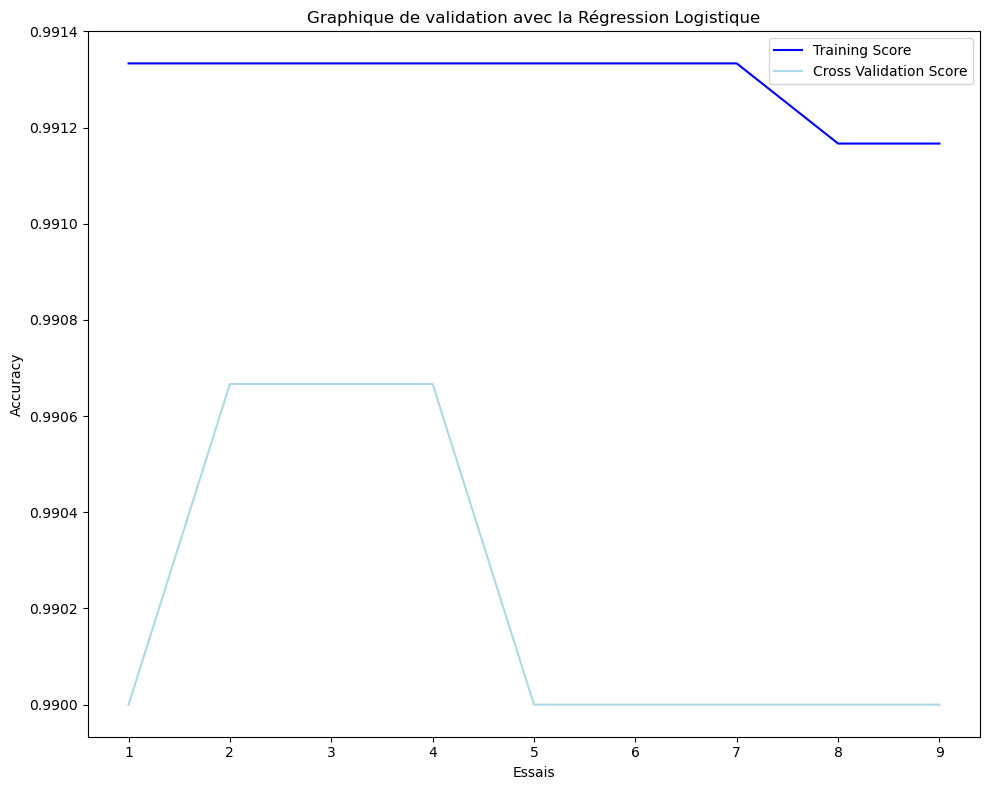

In [97]:
# Calcul de l'accuracy sur les données de train et de test sur une validation croisée à 5 plis
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression

y = billets_full['is_genuine']
X = billets_full[['PC1', 'PC3', 'PC4', 'PC5']]

parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(LogisticRegression(), X, y, param_name='C',
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")
 
# Calculer la moyenne et l'écart type des données train
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculer la moyenne et l'écart type des données test
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Représentation de la validation curve 
fig = plt.figure(figsize=(10,8))
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='lightblue')
 
# Creating the plot
plt.title("Graphique de validation avec la Régression Logistique")
plt.xlabel("Essais")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()
fig.savefig('Validation_curve.png')

Pour la représentation ci-dessus , nous utilisons la métrique accuracy (qui mesure le taux de prédictions correctes).
On voit que la fiabilité du modèle est bonne car les scores du cross validation score varient entre 0.99 et 0.9906 soit une variation très faible. 
Il en est de même pour le training score qui varie très peu aussi. **La performance du modèle est robuste.**

<div style="background-color: RGB(226, 192, 240);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">VIII - Fonction de détection de faux billets </h2>
</div>

Maintenant que la performance et la fiabilité du modèle ont été contrôlées, nous pouvons passer à l'écriture du script qui servira à la detection de faux billets.

In [98]:
# Importation d'un nouveau dataset
billets = pd.read_csv('billets_production.csv')

In [99]:
billets

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [100]:
# Fonction de détection de faux billets sur le modèle choisi
def detection(data, reg, acp): 

    X = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']] 
    
    # Normaliser les données
    X_scaled = pd.DataFrame(std_scale.transform(X), columns=X.columns)
    
    X_acp = pd.DataFrame(acp.transform(X_scaled))

    # Ajouter les 6 PCA dans data
    for i in range(0, 6): 
        data['PC' + str(i + 1)] = X_acp[i]
    
    X = data[['PC1', 'PC3', 'PC4', 'PC5']] ### les composantes utilisées dans la modélisation
    X = sm.add_constant(X)  ### ajouter une constante dans le modele
    
    # Faire les predictions
    data['Probabilités'] = reg.predict(X)
    data['Prédiction']  =  reg.predict(X).round()
    # Renommer colonne prédiction
    data['Prédiction'] = ['Vrai billet' if valeur == 1 else 'Faux billet' for valeur in data['Prédiction'] ]
    
    
    return data[['id', 'Probabilités', 'Prédiction']]
    
detection(billets, modele_logit_multiple_acp, pca)

id  Probabilités   Prédiction
0  A_1      0.000211  Faux billet
1  A_2      0.000003  Faux billet
2  A_3      0.000015  Faux billet
3  A_4      0.971558  Vrai billet
4  A_5      0.999993  Vrai billet